# SENTIMENT ANALYSIS OF RESPONSES FROM BENEFICIARIES TO LIVELIHOOD SUBPROJECTS IN ZAMBIA
**Author:** Nathan Namatama  
**Institution:** Leibniz Institute of Ecological Urban and Regional Development and Technical University of Dresden  
**Year:** 2025  
**Related Publication:** The effects and impacts of livelihood activities and unplanned human settlement growth on greenspace and wetland landscapes in Zambia: *A case of the three areas of the Pilot Programme for Climate Resilience (PPCR)*  

## Purpose of the Analysis
The analysis is conducted on the data collection that was conducted in Zambia from 23rd July 2024 to 22nd September 2024. The primary data was collected using ArcGIS Survey123 application in an offline mode mostly in certain areas that did not have access to internet while those that ahd internet an online mode was used. The respondents were interviewed using a semi structured question and the responses were recorede in the application as they were responding to the questions.

The analysis is done in the framework of _systems thinking_ of looking at _deep leverage points_ in the **_governance for transformation_** of Social Ecologocal Systems so as to attain sustainable transfomation. The analysis is done in both qualitative and quantitatives (descriptions) to produce graphs and tables that are visualised within the jupyterlab notebook.

##  Table of Contents

1. <a href="#1.-Importing-Libraries">Importing Libraries</a>
2. <a href="#2.-Reading-the-Excel-Table">Reading the Excel Table</a>
3. <a href="#3.-Missing-values">Missing values</a>
4. <a href="#4.-Deleting-Columnns">Deleting Columnns</a>
5. <a href="#5.-Renaming-Columns">Renaming Columns</a> 
6. <a href="#6.-Selection-of-Likert-Scale-Columns">Selection of Likert Scale Columns</a>
7. <a href="#7.-The-Number-of-Responses">The Number of Responses</a>
8. <a href="#8.-Defined-or-Responses-with-Choices">Defined or Responses with Choices</a>
9. <a href="#9.-Description-Statistics">Description Statistics</a>
10. <a href="#10.-Reasons">Reasons</a>
11. <a href="#11.-Specific-Variables">Specific Variables</a>
12. <a href="#12.-Converting-the-Notebook">Converting the Notebook</a>

## 1. Importing Libraries 
   The liberarries that are needed for conducting the analysis are installed and downloaded. They are as follows:
- **_NLTK:_** For reading text and understanding it in a way that a human can do it
- **_Re:_** For text manipulation and pattern matching
- **_Pandas:_** For converting tables into a format understandable by the computer as well as visualisation
- **_Numpy:_** For conducting statistical culculations
- **_Matplotlib:_** For visualisation
- **_Seabron:_** For visualisation
- **_Io:_** For reading/writing binary and text data efficiently
- **_Csv:_** For reading the csv files
- **_Unicodeddata:_** For interacting with and analyzing Unicode characters
- **_String:_** For language analysis, user input, or file processing
- **_Plotly:_** For visualisation
- **_Plot_Likert:_** For visualisation of likert scales
- **_%matplotlib line:_** For visualisation within the jupyterlab notebook
- **_Nbconvert:_** For converting to HTML format
- **_WordCloud:_** For creating a word cloud
- **_Bigrams:_** For making words into pairs
- **_Trigrams:_** For making three words sequencies

In [1]:
import nltk
import re
from collections import Counter
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk import sent_tokenize, word_tokenize, pos_tag
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
from io import StringIO
import csv
import unicodedata
import string
import plotly
import plotly.express as px
import plot_likert
from sklearn.model_selection import train_test_split
%matplotlib inline
import nbconvert
from nbconvert import HTMLExporter
import nbformat
from wordcloud import WordCloud
from nltk import bigrams
from nltk import trigrams

In [2]:
nltk.download('punkt_tab')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\nazin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nazin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nazin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\nazin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## 2. Reading the Excel Table
   The csv file is converted to a padas dataframe  
   The dataframe table is displyed with **ALL** columns and rows with cutting any

In [3]:
df = pd.read_csv(r"D:\DataAnalysis\Social_Survey_Questionnaire_for_Beneficiaries_0.csv")
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)  
pd.set_option('display.max_columns', None) 

In [347]:
type(df)

pandas.core.frame.DataFrame

In [4]:
#df

In [349]:
df.shape

(150, 120)

## 3. Missing values
   The Pandas Dataframe is checked for mising values

In [9]:
#df.isnull().sum()

### 3.1 Dropping all the Missing Values

In [10]:
#df.isnull().sum().sort_values(ascending=False)

In [11]:
#df.dropna(inplace=True)

## 4. Deleting Columnns
   There are 120 columns and 85 columns were removed from the pandas dataframe so as to focus on specific columns that have questtions in regards to livelihood and landscape transfromation

In [12]:
df1=df.drop(df.columns[[1,2,3,4,5,6,7,8,9,10,11,12,13,14,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,116,117,118,119]], axis = 1)

In [13]:
#df1

## 5. Renaming Columns
   The headings of the columns were renamed for easy inclusion in the code

In [14]:
df1.columns

Index(['ObjectID', '6. Ward Name', '7. Sub Project Name',
       '8. Type of Livelihood', '9. Size (Lima)', '12. Name of main project',
       '13. Do you represent other beneficiaries?',
       '14. How many beneficiaries do you represent?',
       '45. Are there cultural practices that hinder the sustainable management of Forests, Wetlands, National Game Parks and Biodiversity?',
       '46. What reasons can you give for your answer above?',
       '47. Do you think some cultural practices can be changed?',
       '48. Do you consider cultural aspects when formulating the livelihood projects?',
       '49. What reasons can you give for your answer above?',
       '50. What is the main purpose of landscapes (Forests, Water Bodies, Wetlands… etc.) in your livelihood?',
       '51. Do you think there is need to measure indicators when managing landscapes?',
       '52. How is your connection to nature like?',
       '53. What reasons can you give for your answer above?',
       '54. How

In [15]:
df2=df1.rename(columns= {'1. Do you agree to take part in the above study?': 'Part_study',
                        '2. Do you know that your participation is voluntary and you are free to withdraw anytime?':'Participation_Voluntary', 
                        '3. Do you give permission to the data that emerges to be used by the researchers only in an anonymised form?': 'Anonymised_Form', 
                        '5. Date': 'Date', 
                        '6. Ward Name': 'Ward_Name', 
                        '7. Sub Project Name': 'Sub_Project_name', 
                        '8. Type of Livelihood': 'Livelihood', 
                        '9. Size (Lima)': 'Size', 
                        '12. Name of main project': 'Name_Main_Project',
                        '13. Do you represent other beneficiaries?': 'Representing_Others',
                        '14. How many beneficiaries do you represent?': 'Number_Beneficiaries',
                        '45. Are there cultural practices that hinder the sustainable management of Forests, Wetlands, National Game Parks and Biodiversity?': 'Cultural_Practices_Hinder', 
                        '46. What reasons can you give for your answer above?': 'Cultural_Practices_Hinder_Reason', 
                        '47. Do you think some cultural practices can be changed?': 'Cultural_Practices_Changed', 
                        '48. Do you consider cultural aspects when formulating the livelihood projects?': 'Cultural_Aspects_Considered',
                        '49. What reasons can you give for your answer above?': 'Cultural_Aspects_Considered_Reasons', 
                        '50. What is the main purpose of landscapes (Forests, Water Bodies, Wetlands… etc.) in your livelihood?': 'Purpose_Landscape', 
                        '51. Do you think there is need to measure indicators when managing landscapes?': 'Measure_Indicators', 
                        '52. How is your connection to nature like?': 'Connection_Nature', 
                        '53. What reasons can you give for your answer above?': 'Connection_Nature_Reasons',
                       '54. How long have you worked on this livelihood project?': 'Range_Years',
                       '55. Does your livelihood depend on the natural resources for a living?': 'Livilihood_Depenedent',
                       '56. Do you consider changing your livelihood strategy in future?': 'Change_Livelihood',
                       '57. Do you think it is easier to change your livelihood practices?': 'Change_Livelihood_Easy',
                       '58. Are you able to give reasons for your answer above in your ability to change your livelihood practices?': 'Change_Livelihood_Easy_Reasons',
                       '59. Have the ecosystem services reduced from the inception of the project in your ward?': 'Ecosystem_Services_Reduced',
                       '60. Has the deforestation increased in the ward?': 'Deforestaion_Increased',
                       '61. Do you think protected areas are a hindrance to your livelihoods?': 'Protected_Areas_Hinderarnce_Livelihood',
                       '62. Are there new livelihood projects that you think of that have never been implemented?': 'New_Livelihood_Projects',
                       '63. Do you think the livelihood subprojects are contributing to the sustainability of landscapes?': 'Subprojects_Sustainability_Contribution',
                       '64. Which livelihood is a major contributor to landscape transformation?': 'Contributor_Landscape_Transformation',
                       '65. What reasons can you give for your answer above?': 'Contributor_Landscape_Transformation_Reasons',
                       '66. Which type of landscape do you depend on much for a livelihood?': 'Landscape_Depended_Livelihood',
                       '67. What reasons can you give for your answer above?': 'Landscape_Depeneded_Livelihood_Reasons',
                       'Specify:.4': 'Purpose_Landscape_Specific',
                       'Specify:.5': 'Connection_Nature_Specific',
                       'Specify:.6': 'Contributor_Landscape_Transformation_Specific',
                       'Specify:.7': 'Landscape_Depended_Livelihood_Specific'})

In [16]:
#df2

## 6. Selection of Likert Scale Columns
   The columns that had likert scale responses were group in a single dataframe and they are 12 in number the columns were looking at the following questions as numbered in the questionaire:
- '45. Are there cultural practices that hinder the sustainable management of Forests, Wetlands, National Game Parks and Biodiversity?
- '47. Do you think some cultural practices can be changed?',
- '48. Do you consider cultural aspects when formulating the livelihood projects?',
- '51. Do you think there is need to measure indicators when managing landscapes?',
- '55. Does your livelihood depend on the natural resources for a living?',
- '56. Do you consider changing your livelihood strategy in future?',
- '57. Do you think it is easier to change your livelihood practices?',
- '59. Have the ecosystem services reduced from the inception of the project in your ward?',
- '60. Has the deforestation increased in the ward?',
- '61. Do you think protected areas are a hindrance to your livelihoods?',
- '62. Are there new livelihood projects that you think of that have never been implemented?',
- '63. Do you think the livelihood subprojects are contributing to the sustainability of landscapes?'   

In [17]:
df3=df2.drop(df2.columns[[0,1,2,3,4,5,6,7,9,12,13,15,16,17,21,27,28,29,30,31,32,33,34]], axis = 1)

In [18]:
#df3

## 7. The Number of Responses
   The number of responses were counted for each column that had a likert scale and the NaN indicates no response 

In [19]:
all_counts = df3.apply(pd.Series.value_counts, dropna=False)

In [20]:
all_counts

Cultural_Practices_Hinder  \
Agree_Likert                                     20   
Disagree_Likert                                  22   
Strongly_Agree_Likert                            21   
Strongly_Disagree_Likert                         70   
Undecided_Likert                                  4   
NaN                                              13   

                          Cultural_Practices_Changed  \
Agree_Likert                                      29   
Disagree_Likert                                   22   
Strongly_Agree_Likert                             29   
Strongly_Disagree_Likert                          41   
Undecided_Likert                                   9   
NaN                                               20   

                          Cultural_Aspects_Considered  Measure_Indicators  \
Agree_Likert                                       19                  28   
Disagree_Likert                                    20                   4   
Strongly_Agree_Likert                              22                  81   
Strongly_Disagree_Likert                           66                  22   
Undecided_Likert                                    7                   7   
NaN                                                16                   8   

                          Livilihood_Depenedent  Change_Livelihood  \
Agree_Likert                                 35                 39   
Disagree_Likert                              25                 37   
Strongly_Agree_Likert                        44                 38   
Strongly_Disagree_Likert                     32                 20   
Undecided_Likert                              4                  5   
NaN                                          10                 11   

                          Change_Livelihood_Easy  Ecosystem_Services_Reduced  \
Agree_Likert                                  46                          39   
Disagree_Likert                               24                          13   
Strongly_Agree_Likert                         49                          72   
Strongly_Disagree_Likert                      18                          16   
Undecided_Likert                               4                           3   
NaN                                            9                           7   

                          Deforestaion_Increased  \
Agree_Likert                                  16   
Disagree_Likert                               32   
Strongly_Agree_Likert                         72   
Strongly_Disagree_Likert                      17   
Undecided_Likert                               1   
NaN                                           12   

                          Protected_Areas_Hinderarnce_Livelihood  \
Agree_Likert                                                14.0   
Disagree_Likert                                             19.0   
Strongly_Agree_Likert                                       15.0   
Strongly_Disagree_Likert                                    83.0   
Undecided_Likert                                             NaN   
NaN                                                         19.0   

                          New_Livelihood_Projects  \
Agree_Likert                                   58   
Disagree_Likert                                15   
Strongly_Agree_Likert                          36   
Strongly_Disagree_Likert                       19   
Undecided_Likert                               10   
NaN                                            12   

                          Subprojects_Sustainability_Contribution  
Agree_Likert                                                   37  
Disagree_Likert                                                 4  
Strongly_Agree_Likert                                          81  
Strongly_Disagree_Likert                                       15  
Undecided_Likert                                                3  
NaN                              

### 7.1 Transposing the Dataframe Table
    The columns and the rows were interchanged so that they can be easily presented on the graph

In [21]:
all_counts1 = all_counts.head().T

In [22]:
all_counts1

Agree_Likert  Disagree_Likert  \
Cultural_Practices_Hinder                        20.0             22.0   
Cultural_Practices_Changed                       29.0             22.0   
Cultural_Aspects_Considered                      19.0             20.0   
Measure_Indicators                               28.0              4.0   
Livilihood_Depenedent                            35.0             25.0   
Change_Livelihood                                39.0             37.0   
Change_Livelihood_Easy                           46.0             24.0   
Ecosystem_Services_Reduced                       39.0             13.0   
Deforestaion_Increased                           16.0             32.0   
Protected_Areas_Hinderarnce_Livelihood           14.0             19.0   
New_Livelihood_Projects                          58.0             15.0   
Subprojects_Sustainability_Contribution          37.0              4.0   

                                         Strongly_Agree_Likert  \
Cultural_Practices_Hinder                                 21.0   
Cultural_Practices_Changed                                29.0   
Cultural_Aspects_Considered                               22.0   
Measure_Indicators                                        81.0   
Livilihood_Depenedent                                     44.0   
Change_Livelihood                                         38.0   
Change_Livelihood_Easy                                    49.0   
Ecosystem_Services_Reduced                                72.0   
Deforestaion_Increased                                    72.0   
Protected_Areas_Hinderarnce_Livelihood                    15.0   
New_Livelihood_Projects                                   36.0   
Subprojects_Sustainability_Contribution                   81.0   

                                         Strongly_Disagree_Likert  \
Cultural_Practices_Hinder                                    70.0   
Cultural_Practices_Changed                                   41.0   
Cultural_Aspects_Considered                                  66.0   
Measure_Indicators                                           22.0   
Livilihood_Depenedent                                        32.0   
Change_Livelihood                                            20.0   
Change_Livelihood_Easy                                       18.0   
Ecosystem_Services_Reduced                                   16.0   
Deforestaion_Increased                                       17.0   
Protected_Areas_Hinderarnce_Livelihood                       83.0   
New_Livelihood_Projects                                      19.0   
Subprojects_Sustainability_Contribution                      15.0   

                                         Undecided_Likert  
Cultural_Practices_Hinder                             4.0  
Cultural_Practices_Changed                            9.0  
Cultural_Aspects_Considered                           7.0  
Measure_Indicators                                    7.0  
Livilihood_Depenedent                                 4.0  
Change_Livelihood                                     5.0  
Change_Livelihood_Easy                                4.0  
Ecosystem_Services_Reduced                            3.0  
Deforestaion_Increased                                1.0  
Protected_Areas_Hinderarnce_Livelihood                NaN  
New_Livelihood_Projects                              10.0  
Subprojects_Sustainability_Contribution               3.0

### 7.2 Changing the Order of Columns
    The order of columns was changed so that they can be easily analysed

In [23]:
all_counts2 = all_counts1.iloc[:, [3, 1, 4, 0, 2]]

In [24]:
all_counts2 

Strongly_Disagree_Likert  \
Cultural_Practices_Hinder                                    70.0   
Cultural_Practices_Changed                                   41.0   
Cultural_Aspects_Considered                                  66.0   
Measure_Indicators                                           22.0   
Livilihood_Depenedent                                        32.0   
Change_Livelihood                                            20.0   
Change_Livelihood_Easy                                       18.0   
Ecosystem_Services_Reduced                                   16.0   
Deforestaion_Increased                                       17.0   
Protected_Areas_Hinderarnce_Livelihood                       83.0   
New_Livelihood_Projects                                      19.0   
Subprojects_Sustainability_Contribution                      15.0   

                                         Disagree_Likert  Undecided_Likert  \
Cultural_Practices_Hinder                           22.0               4.0   
Cultural_Practices_Changed                          22.0               9.0   
Cultural_Aspects_Considered                         20.0               7.0   
Measure_Indicators                                   4.0               7.0   
Livilihood_Depenedent                               25.0               4.0   
Change_Livelihood                                   37.0               5.0   
Change_Livelihood_Easy                              24.0               4.0   
Ecosystem_Services_Reduced                          13.0               3.0   
Deforestaion_Increased                              32.0               1.0   
Protected_Areas_Hinderarnce_Livelihood              19.0               NaN   
New_Livelihood_Projects                             15.0              10.0   
Subprojects_Sustainability_Contribution              4.0               3.0   

                                         Agree_Likert  Strongly_Agree_Likert  
Cultural_Practices_Hinder                        20.0                   21.0  
Cultural_Practices_Changed                       29.0                   29.0  
Cultural_Aspects_Considered                      19.0                   22.0  
Measure_Indicators                               28.0                   81.0  
Livilihood_Depenedent                            35.0                   44.0  
Change_Livelihood                                39.0                   38.0  
Change_Livelihood_Easy                           46.0                   49.0  
Ecosystem_Services_Reduced                       39.0                   72.0  
Deforestaion_Increased                           16.0                   72.0  
Protected_Areas_Hinderarnce_Livelihood           14.0                   15.0  
New_Livelihood_Projects                          58.0                   36.0  
Subprojects_Sustainability_Contribution          37.0                   81.0

### 7.3 Visualising the Results
    The results were visualised in form of number of responses

C:\Users\nazin\AppData\Local\anaconda3\envs\NLTK_Py_3_12\Lib\site-packages\plot_likert\plot_likert.py:101: FutureWarning: parameter `plot_percentage` for `plot_likert.likert_counts` is deprecated, set it to None and use `compute_percentages` instead
  warn(


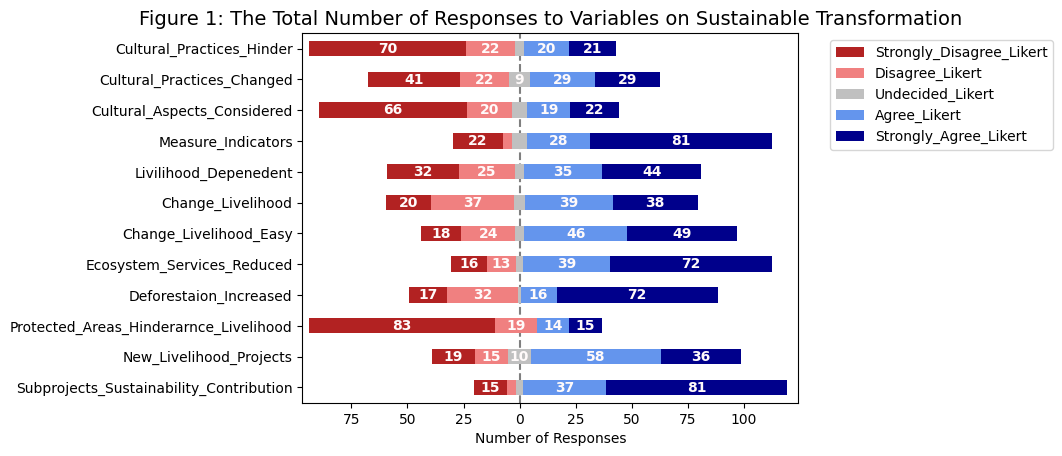

In [25]:
%matplotlib inline
plot_likert.plot_counts(all_counts2, plot_likert.scales.agree,  plot_percentage=False, bar_labels=True, bar_labels_color="snow", colors=plot_likert.colors.default_with_darker_neutral)
plt.title("Figure 1: The Total Number of Responses to Variables on Sustainable Transformation", fontsize=14)
plt.show()

### 7.4 Converting the Responses to Percentages
    The responses were converted to percentages

In [26]:
all_counts3 = df3.apply(lambda col: col.value_counts(normalize=True, dropna=False).round(2))

In [27]:
all_counts3 

Cultural_Practices_Hinder  \
Agree_Likert                                   0.13   
Disagree_Likert                                0.15   
Strongly_Agree_Likert                          0.14   
Strongly_Disagree_Likert                       0.47   
Undecided_Likert                               0.03   
NaN                                            0.09   

                          Cultural_Practices_Changed  \
Agree_Likert                                    0.19   
Disagree_Likert                                 0.15   
Strongly_Agree_Likert                           0.19   
Strongly_Disagree_Likert                        0.27   
Undecided_Likert                                0.06   
NaN                                             0.13   

                          Cultural_Aspects_Considered  Measure_Indicators  \
Agree_Likert                                     0.13                0.19   
Disagree_Likert                                  0.13                0.03   
Strongly_Agree_Likert                            0.15                0.54   
Strongly_Disagree_Likert                         0.44                0.15   
Undecided_Likert                                 0.05                0.05   
NaN                                              0.11                0.05   

                          Livilihood_Depenedent  Change_Livelihood  \
Agree_Likert                               0.23               0.26   
Disagree_Likert                            0.17               0.25   
Strongly_Agree_Likert                      0.29               0.25   
Strongly_Disagree_Likert                   0.21               0.13   
Undecided_Likert                           0.03               0.03   
NaN                                        0.07               0.07   

                          Change_Livelihood_Easy  Ecosystem_Services_Reduced  \
Agree_Likert                                0.31                        0.26   
Disagree_Likert                             0.16                        0.09   
Strongly_Agree_Likert                       0.33                        0.48   
Strongly_Disagree_Likert                    0.12                        0.11   
Undecided_Likert                            0.03                        0.02   
NaN                                         0.06                        0.05   

                          Deforestaion_Increased  \
Agree_Likert                                0.11   
Disagree_Likert                             0.21   
Strongly_Agree_Likert                       0.48   
Strongly_Disagree_Likert                    0.11   
Undecided_Likert                            0.01   
NaN                                         0.08   

                          Protected_Areas_Hinderarnce_Livelihood  \
Agree_Likert                                                0.09   
Disagree_Likert                                             0.13   
Strongly_Agree_Likert                                       0.10   
Strongly_Disagree_Likert                                    0.55   
Undecided_Likert                                             NaN   
NaN                                                         0.13   

                          New_Livelihood_Projects  \
Agree_Likert                                 0.39   
Disagree_Likert                              0.10   
Strongly_Agree_Likert                        0.24   
Strongly_Disagree_Likert                     0.13   
Undecided_Likert                             0.07   
NaN                                          0.08   

                          Subprojects_Sustainability_Contribution  
Agree_Likert                                                 0.25  
Disagree_Likert                                              0.03  
Strongly_Agree_Likert                                        0.54  
Strongly_Disagree_Likert                                     0.10  
Undecided_Likert                                             0.02  
NaN                              

#### 7.4.1 Transposing the Dataframe Table
      Interchanging the rows and columns

In [28]:
all_counts4 = all_counts3.head().T

In [29]:
all_counts4

Agree_Likert  Disagree_Likert  \
Cultural_Practices_Hinder                        0.13             0.15   
Cultural_Practices_Changed                       0.19             0.15   
Cultural_Aspects_Considered                      0.13             0.13   
Measure_Indicators                               0.19             0.03   
Livilihood_Depenedent                            0.23             0.17   
Change_Livelihood                                0.26             0.25   
Change_Livelihood_Easy                           0.31             0.16   
Ecosystem_Services_Reduced                       0.26             0.09   
Deforestaion_Increased                           0.11             0.21   
Protected_Areas_Hinderarnce_Livelihood           0.09             0.13   
New_Livelihood_Projects                          0.39             0.10   
Subprojects_Sustainability_Contribution          0.25             0.03   

                                         Strongly_Agree_Likert  \
Cultural_Practices_Hinder                                 0.14   
Cultural_Practices_Changed                                0.19   
Cultural_Aspects_Considered                               0.15   
Measure_Indicators                                        0.54   
Livilihood_Depenedent                                     0.29   
Change_Livelihood                                         0.25   
Change_Livelihood_Easy                                    0.33   
Ecosystem_Services_Reduced                                0.48   
Deforestaion_Increased                                    0.48   
Protected_Areas_Hinderarnce_Livelihood                    0.10   
New_Livelihood_Projects                                   0.24   
Subprojects_Sustainability_Contribution                   0.54   

                                         Strongly_Disagree_Likert  \
Cultural_Practices_Hinder                                    0.47   
Cultural_Practices_Changed                                   0.27   
Cultural_Aspects_Considered                                  0.44   
Measure_Indicators                                           0.15   
Livilihood_Depenedent                                        0.21   
Change_Livelihood                                            0.13   
Change_Livelihood_Easy                                       0.12   
Ecosystem_Services_Reduced                                   0.11   
Deforestaion_Increased                                       0.11   
Protected_Areas_Hinderarnce_Livelihood                       0.55   
New_Livelihood_Projects                                      0.13   
Subprojects_Sustainability_Contribution                      0.10   

                                         Undecided_Likert  
Cultural_Practices_Hinder                            0.03  
Cultural_Practices_Changed                           0.06  
Cultural_Aspects_Considered                          0.05  
Measure_Indicators                                   0.05  
Livilihood_Depenedent                                0.03  
Change_Livelihood                                    0.03  
Change_Livelihood_Easy                               0.03  
Ecosystem_Services_Reduced                           0.02  
Deforestaion_Increased                               0.01  
Protected_Areas_Hinderarnce_Livelihood                NaN  
New_Livelihood_Projects                              0.07  
Subprojects_Sustainability_Contribution              0.02

#### 7.4.2 Changing the Order of Columns
      The order of columns was changed

In [30]:
all_counts5 = all_counts4.iloc[:, [3, 1, 4, 0, 2]]

In [31]:
all_counts5 

Strongly_Disagree_Likert  \
Cultural_Practices_Hinder                                    0.47   
Cultural_Practices_Changed                                   0.27   
Cultural_Aspects_Considered                                  0.44   
Measure_Indicators                                           0.15   
Livilihood_Depenedent                                        0.21   
Change_Livelihood                                            0.13   
Change_Livelihood_Easy                                       0.12   
Ecosystem_Services_Reduced                                   0.11   
Deforestaion_Increased                                       0.11   
Protected_Areas_Hinderarnce_Livelihood                       0.55   
New_Livelihood_Projects                                      0.13   
Subprojects_Sustainability_Contribution                      0.10   

                                         Disagree_Likert  Undecided_Likert  \
Cultural_Practices_Hinder                           0.15              0.03   
Cultural_Practices_Changed                          0.15              0.06   
Cultural_Aspects_Considered                         0.13              0.05   
Measure_Indicators                                  0.03              0.05   
Livilihood_Depenedent                               0.17              0.03   
Change_Livelihood                                   0.25              0.03   
Change_Livelihood_Easy                              0.16              0.03   
Ecosystem_Services_Reduced                          0.09              0.02   
Deforestaion_Increased                              0.21              0.01   
Protected_Areas_Hinderarnce_Livelihood              0.13               NaN   
New_Livelihood_Projects                             0.10              0.07   
Subprojects_Sustainability_Contribution             0.03              0.02   

                                         Agree_Likert  Strongly_Agree_Likert  
Cultural_Practices_Hinder                        0.13                   0.14  
Cultural_Practices_Changed                       0.19                   0.19  
Cultural_Aspects_Considered                      0.13                   0.15  
Measure_Indicators                               0.19                   0.54  
Livilihood_Depenedent                            0.23                   0.29  
Change_Livelihood                                0.26                   0.25  
Change_Livelihood_Easy                           0.31                   0.33  
Ecosystem_Services_Reduced                       0.26                   0.48  
Deforestaion_Increased                           0.11                   0.48  
Protected_Areas_Hinderarnce_Livelihood           0.09                   0.10  
New_Livelihood_Projects                          0.39                   0.24  
Subprojects_Sustainability_Contribution          0.25                   0.54

#### 7.4.3 Visualising the Results
    The results are visualised as pecentages

C:\Users\nazin\AppData\Local\anaconda3\envs\NLTK_Py_3_12\Lib\site-packages\plot_likert\plot_likert.py:101: FutureWarning: parameter `plot_percentage` for `plot_likert.likert_counts` is deprecated, set it to None and use `compute_percentages` instead
  warn(


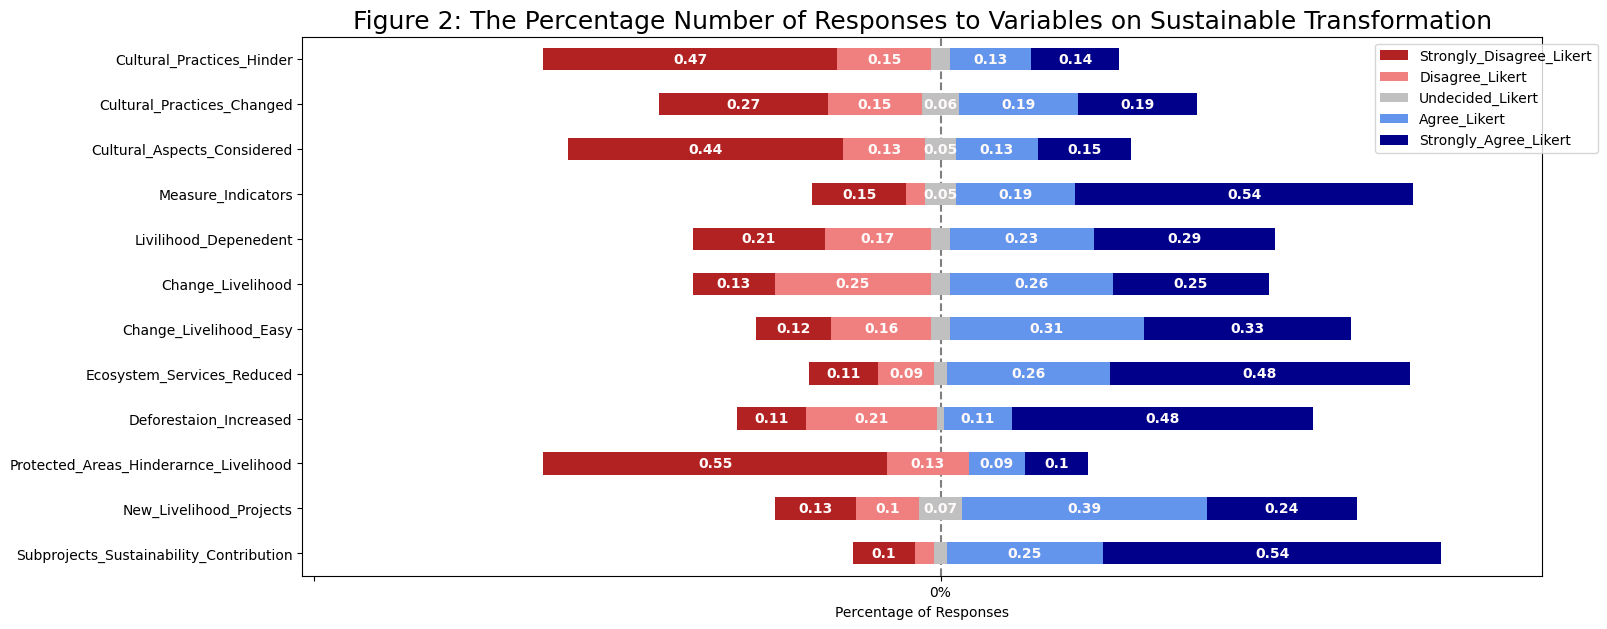

In [32]:
%matplotlib inline
plot_likert.plot_counts(all_counts5, plot_likert.scales.agree,  plot_percentage=True, figsize=(16, 7), bar_labels=True, bar_labels_color="snow", colors=plot_likert.colors.default_with_darker_neutral)
plt.title("Figure 2: The Percentage Number of Responses to Variables on Sustainable Transformation", fontsize=18)
plt.show()

[<a href="#Purpose-of-the-Analysis">Back to top</a>]

## 8. Defined or Responses with Choices
    The responses that had choices other than those with a likert scale were grouped in a pandas dataframe looking the following question:
    
1. '50. What is the main purpose of landscapes (Forests, Water Bodies, Wetlands… etc.) in your livelihood?': 'Purpose_Landscape', 
2. '52. How is your connection to nature like?': 'Connection_Nature', 
3. '54. How long have you worked on this livelihood project?': 'Range_Years',
4. '64. Which livelihood is a major contributor to landscape transformation?': 'Contributor_Landscape_Transformation',
5. '66. Which type of landscape do you depend on much for a livelihood?': 'Landscape_Depended_Livelihood'
    

In [33]:
df4=df2.drop(df2.columns[[0,1,2,3,4,5,6,7,8,9,10,11,12,14,16,18,19,20,21,22,23,24,25,26,28,30,31,32,33,34]], axis = 1)

In [34]:
#df4

### 8.1 The Purpose of Landscape to People

In [35]:
PL = df4['Purpose_Landscape'].value_counts(dropna=False)
PL_P = (df4['Purpose_Landscape'].value_counts(normalize=True, dropna=False).round(2))

In [36]:
PL_P

Purpose_Landscape
Nature_Protection_Purpose                              0.62
NaN                                                    0.22
Source_Income_Purpose                                  0.11
Nature_Protection_Purpose,Other_Purpose                0.01
Nature_Protection_Purpose,Ancestral_Shrines_Purpose    0.01
Source_Income_Purpose,Nature_Protection_Purpose        0.01
Nature_Protection_Purpose,Source_Income_Purpose        0.01
Source_Income_Purpose,Other_Purpose                    0.01
No_Idea_Purpose                                        0.01
Other_Purpose                                          0.01
Name: proportion, dtype: float64

In [37]:
df_PL = pd.DataFrame(PL)

In [38]:
df_PL

count
Purpose_Landscape                                         
Nature_Protection_Purpose                               93
NaN                                                     33
Source_Income_Purpose                                   16
Nature_Protection_Purpose,Other_Purpose                  2
Nature_Protection_Purpose,Ancestral_Shrines_Purpose      1
Source_Income_Purpose,Nature_Protection_Purpose          1
Nature_Protection_Purpose,Source_Income_Purpose          1
Source_Income_Purpose,Other_Purpose                      1
No_Idea_Purpose                                          1
Other_Purpose                                            1

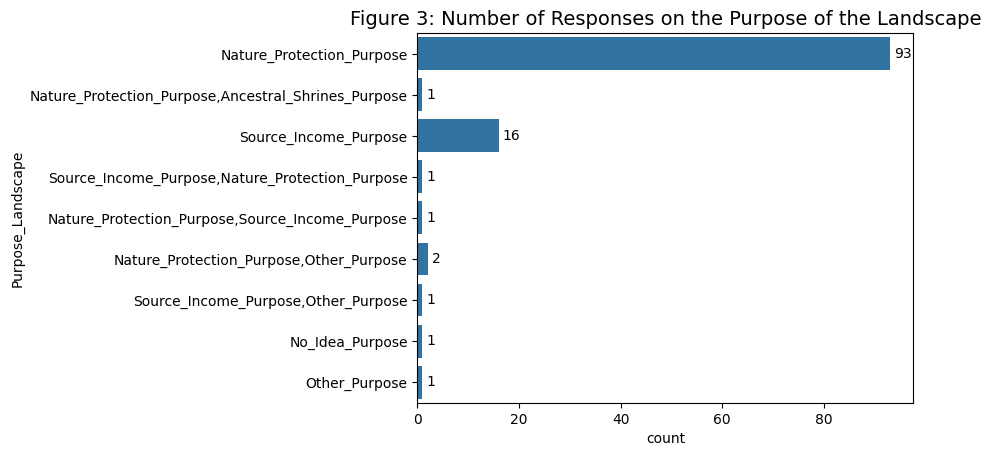

In [39]:
ax = sns.countplot(df4["Purpose_Landscape"])
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type="edge", padding=3)
    ax.set_title("Figure 3: Number of Responses on the Purpose of the Landscape", fontsize=14)
plt.show()

### 8.2 The Connection of Nature to People

In [40]:
CN = df4['Connection_Nature'].value_counts(dropna=False)
CN_P = (df4['Connection_Nature'].value_counts(normalize=True, dropna=False).round(2))

In [41]:
CN_P

Connection_Nature
Material_Connection                                  0.82
NaN                                                  0.09
Other_Connection                                     0.04
Experiential_Connection                              0.01
Philosophical_Connection,Psychological_Connection    0.01
Psychological_Connection,Material_Connection         0.01
Psychological_Connection                             0.01
Philosophical_Connection                             0.01
Experiential_Connection,Material_Connection          0.01
Name: proportion, dtype: float64

In [42]:
df_CN = pd.DataFrame(CN)

In [43]:
df_CN

count
Connection_Nature                                       
Material_Connection                                  123
NaN                                                   13
Other_Connection                                       6
Experiential_Connection                                2
Philosophical_Connection,Psychological_Connection      2
Psychological_Connection,Material_Connection           1
Psychological_Connection                               1
Philosophical_Connection                               1
Experiential_Connection,Material_Connection            1

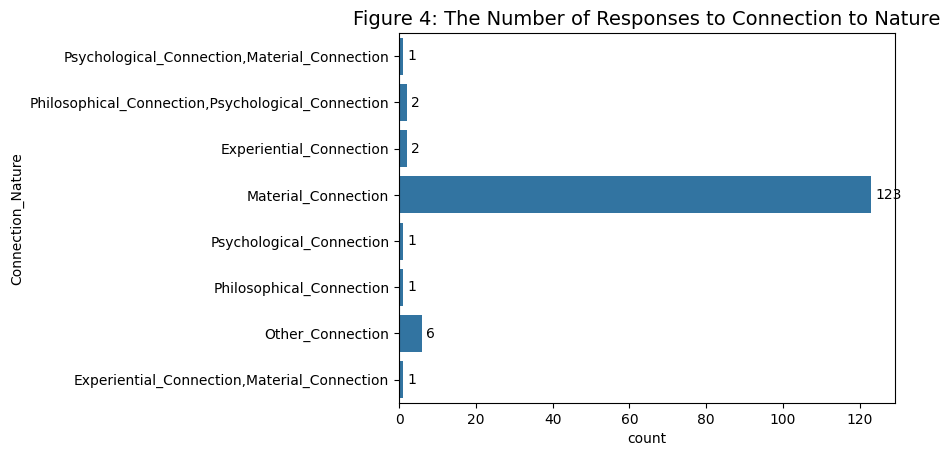

In [44]:
ax = sns.countplot(df4["Connection_Nature"])
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type="edge", padding=3)
    ax.set_title("Figure 4: The Number of Responses to Connection to Nature", fontsize=14)
plt.show()

In [46]:
agreement_levels = ["Material_Connection", "Other_Connection"]
CN_R = df2[df2["Connection_Nature"].isin(agreement_levels)]
CN_R1 = CN_R.drop(CN_R.columns[[0,1,2,3,4,6,7,8,9,10,11,12,13,14,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34]], axis = 1)
CN_R1grouped = CN_R1.groupby('Name_Main_Project')['Connection_Nature']
#CN_R1

In [47]:
lemmatizer=WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
for index, row in CN_R1.iterrows():
    CN_R1_filter_sentence = []
    CN_R1_sentence = row["Connection_Nature_Reasons"]
    if pd.isnull(CN_R1_sentence):
       continue
    CN_R1_sentence_cleaned = re.sub(r'[^\w\s]','',CN_R1_sentence)
    CN_R1_words = nltk.word_tokenize(CN_R1_sentence_cleaned)
    CN_R1_words = [lemmatizer.lemmatize(w) for w in CN_R1_words if w.lower() not in stop_words]
    CN_R1_filter_sentence.extend(CN_R1_words)
    print(CN_R1_filter_sentence)

['use', 'income']
['source', 'income', 'future', 'generation', 'see']
['Source', 'income']
['source', 'income']
['Thats', 'get', 'income', 'well', 'example', 'cattle', 'use', 'cultivating']
['game', 'park', 'help', 'u', 'source', 'income', 'form', 'meat', 'animal', 'tree', 'rain', 'come', 'protected']
['need', 'keep', 'fish', 'instance', 'fish', 'pond', 'get', 'extinct']
['one', 'look', 'daily', 'basis']
['source', 'livelihood']
['need', 'protect', 'nature', 'instance', 'cutting', 'tree', 'along', 'river', 'lead', 'drying', 'destruction', 'animal', 'biodiversity', 'river']
['answer']
['purpose', 'future', 'meet', 'need']
['source', 'income']
['tree', 'help', 'u', 'bring', 'rainfall']
['Source', 'income']
['harvest', 'right', 'time', 'prevent', 'management', 'natural', 'resource', 'properly']
['taking', 'care']
['Source', 'income']
['Source', 'income']
['bring', 'development', 'tourism']
['income']
['natural', 'resource', 'like', 'tree', 'give', 'shade', 'medicine', 'also', 'get', 'fres

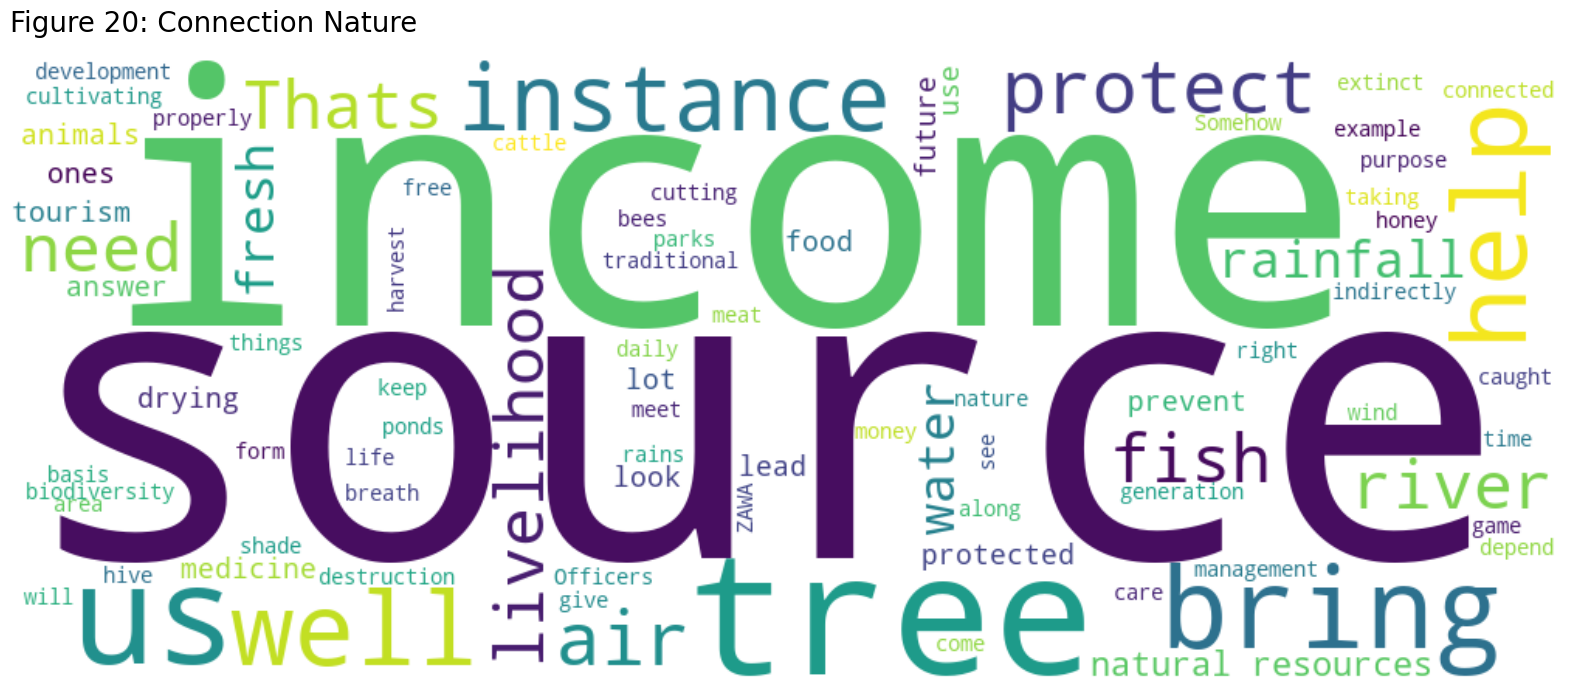

In [48]:
CN_R1["Connection_Nature_Reasons"] = CN_R1["Connection_Nature_Reasons"].fillna("")  
CN_R1["Connection_Nature_Reasons"] = CN_R1["Connection_Nature_Reasons"].astype(str)
CN_R1_Text = " ".join(CN_R1["Connection_Nature_Reasons"])
wordcloud = WordCloud(background_color = "white", width = 1000, height = 400).generate(CN_R1_Text)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("Figure 20: Connection Nature", loc="left", fontsize=20, pad=20)
plt.axis("off")  
plt.show()

In [49]:
CN_R1_bigrams_list = list(CN_R1_filter_sentence)
print(CN_R1_bigrams_list)
#CN_R1_bigram_counts = Counter(zip(bigrams_list, CN_R1_bigrams_list[1:]))
#print(CN_R1_bigram_counts)  
#CN_R1_bigrams = pd.DataFrame(CN_R1_bigram_counts.most_common(7),
#columns = ['Word', 'Frequency'])
#print(CN_R1_bigrams)

[]


### 8.3 The Length of Existence of the Livelihood Project

In [50]:
RY_grouped = df2.groupby('Name_Main_Project')['Range_Years'].value_counts(dropna=False)

In [51]:
RY_grouped

Name_Main_Project                     Range_Years           
EbA_CENTRAL_MUCHINGA_LUAPULA          3to4Years_Long             2
                                      NaN                        1
Ecosystem Conservation_NORTH_WESTERN  3to4Years_Long             8
                                      NaN                        2
                                      7to8Years_Long             1
PIN_WESTERN                           3to4Years_Long             5
                                      NaN                        1
SCRALA_SOUTHERN_WESTERN_NORTHEN       3to4Years_Long            12
                                      5to6Years_Long             9
                                      Lessthan2Years_Long        6
                                      Greaterthan9Years_Long     2
                                      7to8Years_Long             1
SCReBS_WESTERN                        5to6Years_Long             5
                                      7to8Years_Long             5
 

In [52]:
RY_grouped1 = pd.DataFrame(RY_grouped)

In [53]:
RY_grouped1

count
Name_Main_Project                    Range_Years                  
EbA_CENTRAL_MUCHINGA_LUAPULA         3to4Years_Long              2
                                     NaN                         1
Ecosystem Conservation_NORTH_WESTERN 3to4Years_Long              8
                                     NaN                         2
                                     7to8Years_Long              1
PIN_WESTERN                          3to4Years_Long              5
                                     NaN                         1
SCRALA_SOUTHERN_WESTERN_NORTHEN      3to4Years_Long             12
                                     5to6Years_Long              9
                                     Lessthan2Years_Long         6
                                     Greaterthan9Years_Long      2
                                     7to8Years_Long              1
SCReBS_WESTERN                       5to6Years_Long              5
                                     7to8Years_Long              5
                                     Greaterthan9Years_Long      3
                                     3to4Years_Long              2
SCRiKA_LS                            5to6Years_Long             31
                                     3to4Years_Long              6
                                     NaN                         5
                                     7to8Years_Long              2
TRALARD_LNM                          3to4Years_Long             28
                                     5to6Years_Long              5
                                     Lessthan2Years_Long         3
                                     Greaterthan9Years_Long      2
                                     NaN                         2

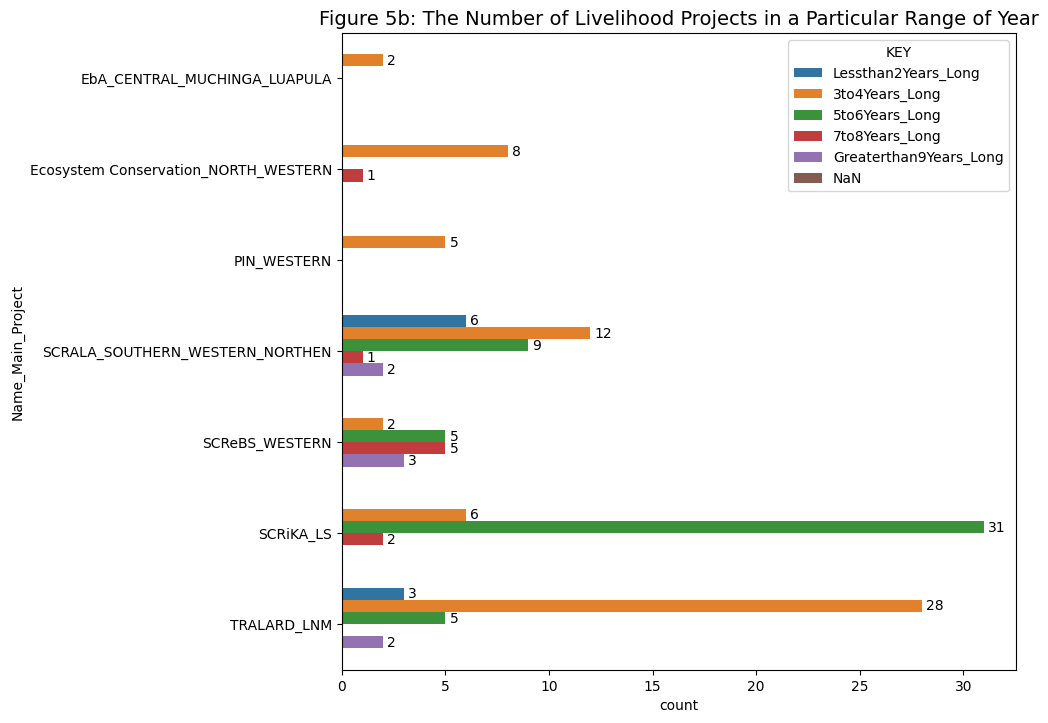

In [54]:
plt.figure(figsize=(8.7, 8.27))
hue_order = ["Lessthan2Years_Long", "3to4Years_Long", "5to6Years_Long", "7to8Years_Long", "Greaterthan9Years_Long", "NaN"]
ax = sns.barplot(data = RY_grouped1, x="count", y="Name_Main_Project", hue="Range_Years", hue_order=hue_order, legend=True)
ax.set_title("Figure 5b: The Number of Livelihood Projects in a Particular Range of Year", fontsize=14)
plt.legend(title="KEY")
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type="edge", padding=3)
plt.show()

In [55]:
LP = df4['Range_Years'].value_counts(dropna=False)
LP_P = (df4['Range_Years'].value_counts(normalize=True, dropna=False).round(2))

In [56]:
LP_P

Range_Years
3to4Years_Long            0.42
5to6Years_Long            0.33
NaN                       0.08
Lessthan2Years_Long       0.06
7to8Years_Long            0.06
Greaterthan9Years_Long    0.05
Name: proportion, dtype: float64

In [57]:
df_LP = pd.DataFrame(LP)

In [58]:
df_LP

count
Range_Years                  
3to4Years_Long             63
5to6Years_Long             50
NaN                        12
Lessthan2Years_Long         9
7to8Years_Long              9
Greaterthan9Years_Long      7

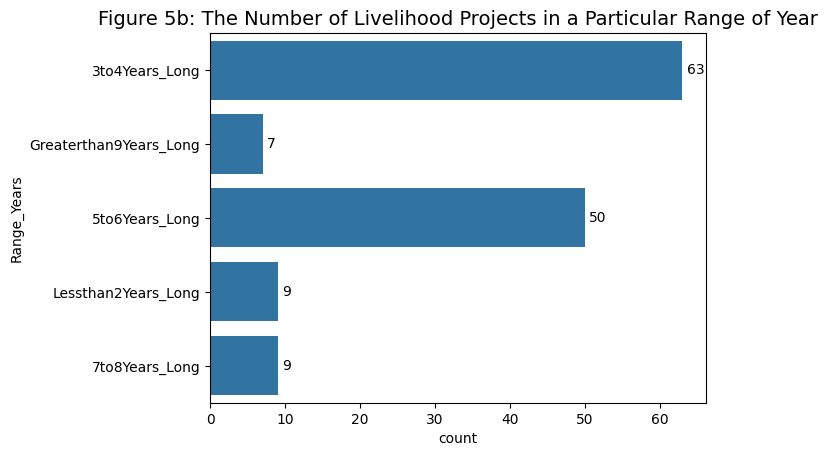

In [59]:
ax = sns.countplot(df4["Range_Years"])
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type="edge", padding=3)
    ax.set_title("Figure 5b: The Number of Livelihood Projects in a Particular Range of Year", fontsize=14)
plt.show()

### 8.4 Major Contributor to Landscape Transformation

In [60]:
CLT_grouped = df2.groupby('Name_Main_Project')['Contributor_Landscape_Transformation'].value_counts(dropna=False)

In [61]:
CLT_grouped

Name_Main_Project                     Contributor_Landscape_Transformation
EbA_CENTRAL_MUCHINGA_LUAPULA          Land_Agriculture                         3
Ecosystem Conservation_NORTH_WESTERN  Land_Agriculture                         3
                                      Uncontrolled_Fires                       3
                                      NaN                                      3
                                      Uncontrolled_Fires,Land_Agriculture      1
                                      Wood_Extraction                          1
PIN_WESTERN                           Uncontrolled_Fires                       3
                                      Wood_Extraction                          2
                                      NaN                                      1
SCRALA_SOUTHERN_WESTERN_NORTHEN       Uncontrolled_Fires                      19
                                      Wood_Extraction                          7
                                  

In [62]:
CLT_grouped1 = pd.DataFrame(CLT_grouped)

In [63]:
CLT_grouped1

count
Name_Main_Project                    Contributor_Landscape_Transformation       
EbA_CENTRAL_MUCHINGA_LUAPULA         Land_Agriculture                          3
Ecosystem Conservation_NORTH_WESTERN Land_Agriculture                          3
                                     Uncontrolled_Fires                        3
                                     NaN                                       3
                                     Uncontrolled_Fires,Land_Agriculture       1
                                     Wood_Extraction                           1
PIN_WESTERN                          Uncontrolled_Fires                        3
                                     Wood_Extraction                           2
                                     NaN                                       1
SCRALA_SOUTHERN_WESTERN_NORTHEN      Uncontrolled_Fires                       19
                                     Wood_Extraction                           7
                                     Land_Agriculture                          2
                                     NaN                                       2
SCReBS_WESTERN                       Uncontrolled_Fires                        7
                                     Wood_Extraction                           5
                                     Land_Agriculture                          2
                                     Other                                     1
SCRiKA_LS                            Uncontrolled_Fires                       13
                                     Land_Agriculture                         12
                                     Wood_Extraction                          11
                                     NaN                                       6
                                     Uncontrolled_Grazing                      2
TRALARD_LNM                          Land_Agriculture                         22
                                     Wood_Extraction                          13
                                     Uncontrolled_Fires                        4
                                     NaN                                       1

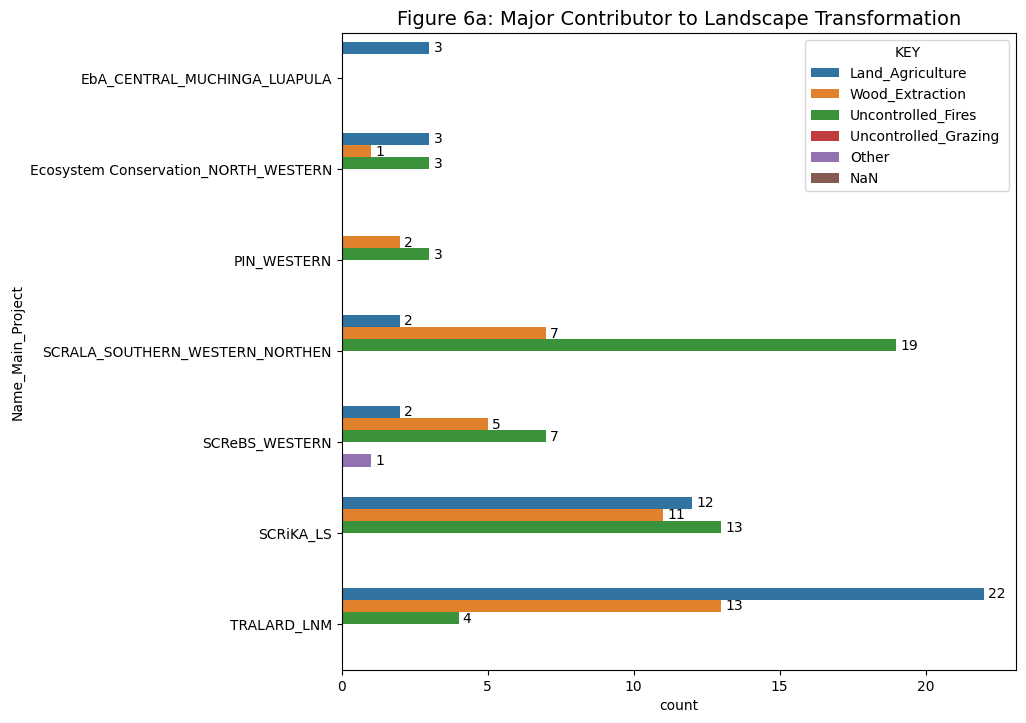

In [64]:
plt.figure(figsize=(8.7, 8.27))
hue_order = ["Land_Agriculture", "Wood_Extraction", "Uncontrolled_Fires", "Uncontrolled_Grazing ", "Other", "NaN"]
ax = sns.barplot(data = CLT_grouped1, x="count", y="Name_Main_Project", hue="Contributor_Landscape_Transformation", hue_order=hue_order, legend=True)
ax.set_title("Figure 6a: Major Contributor to Landscape Transformation", fontsize=14)
plt.legend(title="KEY")
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type="edge", padding=3)
plt.show()

In [65]:
CLT = df4['Contributor_Landscape_Transformation'].value_counts(dropna=False)
CLT_P = (df4['Contributor_Landscape_Transformation'].value_counts(normalize=True, dropna=False).round(2))

In [66]:
CLT_P

Contributor_Landscape_Transformation
Uncontrolled_Fires                     0.33
Land_Agriculture                       0.29
Wood_Extraction                        0.26
NaN                                    0.09
Uncontrolled_Grazing                   0.01
Uncontrolled_Fires,Land_Agriculture    0.01
Other                                  0.01
Name: proportion, dtype: float64

In [67]:
df_CLT = pd.DataFrame(CLT)

In [68]:
df_CLT

count
Contributor_Landscape_Transformation       
Uncontrolled_Fires                       49
Land_Agriculture                         44
Wood_Extraction                          39
NaN                                      14
Uncontrolled_Grazing                      2
Uncontrolled_Fires,Land_Agriculture       1
Other                                     1

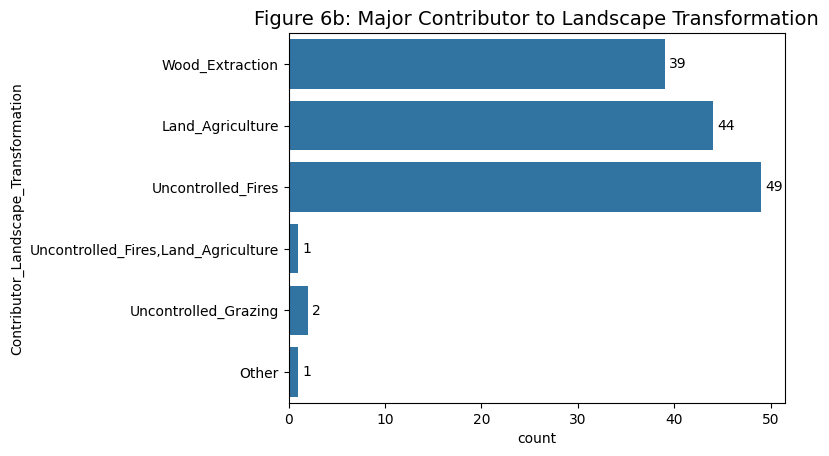

In [69]:
ax = sns.countplot(df4["Contributor_Landscape_Transformation"])
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type="edge", padding=3)
    ax.set_title("Figure 6b: Major Contributor to Landscape Transformation", fontsize=14)
plt.show()

In [71]:
agreement_levels = ["Wood_Extration", "Land_Agriculture","Uncontrolled_Fires"]
CLT_R = df2[df2["Contributor_Landscape_Transformation"].isin(agreement_levels)]
CLT_R1 = CN_R.drop(CLT_R.columns[[0,1,2,3,4,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,29,30,31,32,33,34]], axis = 1)
CLT_R1grouped = CLT_R1.groupby('Name_Main_Project')['Contributor_Landscape_Transformation']
#CLT_R1

In [72]:
lemmatizer=WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
for index, row in CLT_R1.iterrows():
    CLT_R1_filter_sentence = []
    CLT_R1_sentence = row["Contributor_Landscape_Transformation_Reasons"]
    if pd.isnull(CLT_R1_sentence):
       continue
    CLT_R1_sentence_cleaned = re.sub(r'[^\w\s]','',CLT_R1_sentence)
    CLT_R1_words = nltk.word_tokenize(CLT_R1_sentence_cleaned)
    CLT_R1_words = [lemmatizer.lemmatize(w) for w in CLT_R1_words if w.lower() not in stop_words]
    CLT_R1_filter_sentence.extend(CLT_R1_words)
    print(CLT_R1_filter_sentence)

['requires', 'huge', 'land', 'others', 'like', 'making', 'charcoal']
['burning', 'charcoal', 'give', 'smoke', 'destroys', 'ozone', 'layer', 'well', 'brings', 'acidic', 'rain']
['agriculture', 'activity', 'food']
['electricity', 'thus', 'huge', 'demand', 'energy']
['charcoal', 'purpose', 'bad', 'land', 'left', 'bare', 'unlike', 'agriculture', 'cutting', 'replaced', 'plant']
['cultivation', 'cassava', 'requires', 'always', 'barren', 'land', 'never', 'cultivated', 'grow', 'well', 'crop', 'bean', 'vegetable', 'maize', 'reduce', 'deforestation']
['burn', 'tree', 'shoot']
['Chitemene', 'system', 'cultivation', 'lead', 'deforestation', 'others']
['source', 'food', 'people', 'area']
['Thats', 'get', 'livelihood']
['source', 'income']
['time', 'cut', 'tree', 'even', 'want', 'cultivate', 'well', 'burining', 'kill', 'animal', 'necesary', 'making', 'soil', 'fertile']
['Buring', 'destroy', 'product', 'crop', 'soil']
['cutting', 'treed', 'change', 'landscape']
['cutting', 'tress', 'destroys', 'much'

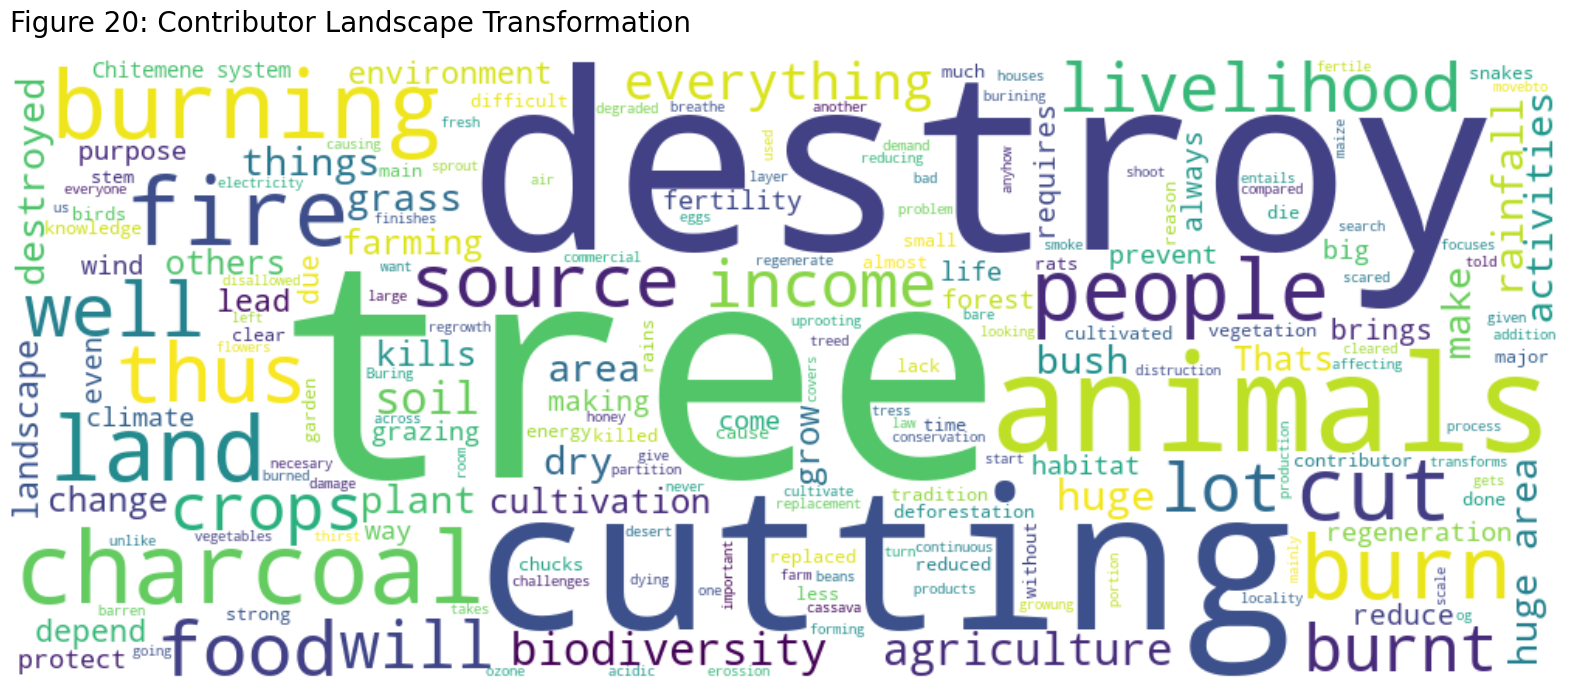

In [73]:
CLT_R1["Contributor_Landscape_Transformation_Reasons"] = CLT_R1["Contributor_Landscape_Transformation_Reasons"].fillna("")  
CLT_R1["Contributor_Landscape_Transformation_Reasons"] = CLT_R1["Contributor_Landscape_Transformation_Reasons"].astype(str)
CLT_R1_Text = " ".join(CLT_R1["Contributor_Landscape_Transformation_Reasons"])
wordcloud = WordCloud(background_color = "white", width = 1000, height = 400).generate(CLT_R1_Text)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("Figure 20: Contributor Landscape Transformation", loc="left", fontsize=20, pad=20)
plt.axis("off")  
plt.show()

### 8.5 The Landscape Depended on for a Livelihood

In [74]:
LDL_grouped = df2.groupby('Name_Main_Project')['Landscape_Depended_Livelihood'].value_counts(dropna=False)

In [75]:
LDL_grouped

Name_Main_Project                     Landscape_Depended_Livelihood                 
EbA_CENTRAL_MUCHINGA_LUAPULA          Agriculture_Areas_Dependent                        3
Ecosystem Conservation_NORTH_WESTERN  NaN                                                5
                                      Agriculture_Areas_Dependent                        3
                                      Forest_Dependent                                   2
                                      Wetlands_Dependent                                 1
PIN_WESTERN                           Agriculture_Areas_Dependent                        5
                                      NaN                                                1
SCRALA_SOUTHERN_WESTERN_NORTHEN       Agriculture_Areas_Dependent                       21
                                      Wetlands_Dependent                                 6
                                      Forest_Dependent                                   2
     

In [76]:
LDL_grouped1 = pd.DataFrame(LDL_grouped)

In [77]:
LDL_grouped1

count
Name_Main_Project                    Landscape_Depended_Livelihood                        
EbA_CENTRAL_MUCHINGA_LUAPULA         Agriculture_Areas_Dependent                         3
Ecosystem Conservation_NORTH_WESTERN NaN                                                 5
                                     Agriculture_Areas_Dependent                         3
                                     Forest_Dependent                                    2
                                     Wetlands_Dependent                                  1
PIN_WESTERN                          Agriculture_Areas_Dependent                         5
                                     NaN                                                 1
SCRALA_SOUTHERN_WESTERN_NORTHEN      Agriculture_Areas_Dependent                        21
                                     Wetlands_Dependent                                  6
                                     Forest_Dependent                                    2
                                     NaN                                                 1
SCReBS_WESTERN                       Agriculture_Areas_Dependent                        10
                                     Wetlands_Dependent                                  5
SCRiKA_LS                            Agriculture_Areas_Dependent                        30
                                     Forest_Dependent                                    4
                                     Wetlands_Dependent                                  4
                                     NaN                                                 4
                                     Wetlands_Dependent,Forest_Dependent                 2
TRALARD_LNM                          Agriculture_Areas_Dependent                        20
                                     Wetlands_Dependent                                  9
                                     Forest_Dependent                                    5
                                     Wetlands_Dependent,Forest_Dependent                 2
                                     Agriculture_Areas_Dependent,Wetlands_Dependent      1
                                     Forest_Dependent,Wetlands_Dependent                 1
                                     Wetlands_Dependent,Agriculture_Areas_Dependent      1
                                     NaN                                                 1

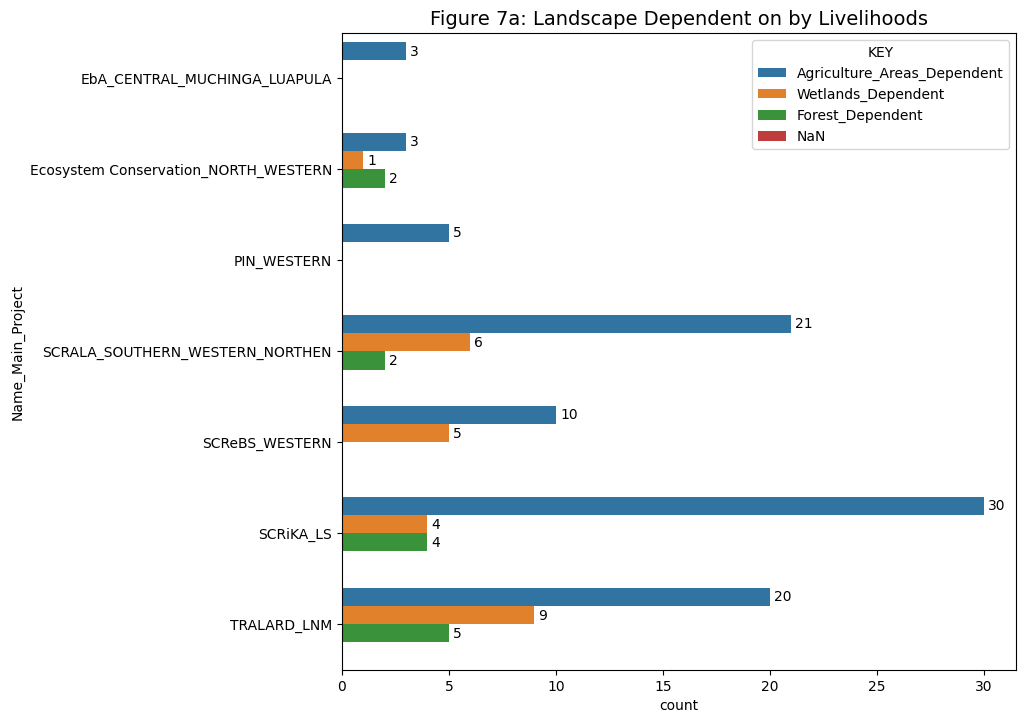

In [78]:
plt.figure(figsize=(8.7, 8.27))
hue_order = ["Agriculture_Areas_Dependent", "Wetlands_Dependent", "Forest_Dependent", "NaN"]
ax = sns.barplot(data = LDL_grouped1, x="count", y="Name_Main_Project", hue="Landscape_Depended_Livelihood", hue_order=hue_order, legend=True)
ax.set_title("Figure 7a: Landscape Dependent on by Livelihoods", fontsize=14)
plt.legend(title="KEY")
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type="edge", padding=3)
plt.show()

In [79]:
LDL = df4['Landscape_Depended_Livelihood'].value_counts(dropna=False)
LDL_P = (df4['Landscape_Depended_Livelihood'].value_counts(normalize=True, dropna=False).round(2))

In [80]:
LDL_P

Landscape_Depended_Livelihood
Agriculture_Areas_Dependent                       0.61
Wetlands_Dependent                                0.17
Forest_Dependent                                  0.09
NaN                                               0.09
Wetlands_Dependent,Forest_Dependent               0.03
Agriculture_Areas_Dependent,Wetlands_Dependent    0.01
Forest_Dependent,Wetlands_Dependent               0.01
Wetlands_Dependent,Agriculture_Areas_Dependent    0.01
Name: proportion, dtype: float64

In [81]:
df_LDL = pd.DataFrame(LDL)

In [82]:
df_LDL

count
Landscape_Depended_Livelihood                        
Agriculture_Areas_Dependent                        92
Wetlands_Dependent                                 25
Forest_Dependent                                   13
NaN                                                13
Wetlands_Dependent,Forest_Dependent                 4
Agriculture_Areas_Dependent,Wetlands_Dependent      1
Forest_Dependent,Wetlands_Dependent                 1
Wetlands_Dependent,Agriculture_Areas_Dependent      1

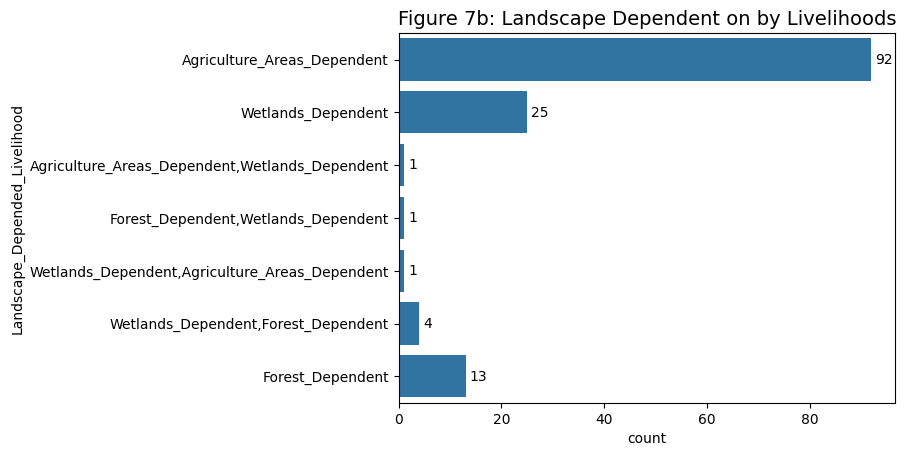

In [83]:
ax = sns.countplot(df4["Landscape_Depended_Livelihood"])
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type="edge", padding=3)
    ax.set_title("Figure 7b: Landscape Dependent on by Livelihoods", fontsize=14)
plt.show()

In [85]:
agreement_levels = ["Agriculture_Areas_Dependent", "Wetlands_Dependent","Forest_Dependent"]
LDL_R = df2[df2["Landscape_Depended_Livelihood"].isin(agreement_levels)]
LDL_R1 = LDL_R.drop(LDL_R.columns[[0,1,2,3,4,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,31,32,33,34]], axis = 1)
LDL_R1grouped = LDL_R1.groupby('Name_Main_Project')['Landscape_Depended_Livelihood']
#LDL_R1

In [86]:
lemmatizer=WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
for index, row in LDL_R1.iterrows():
    LDL_R1_filter_sentence = []
    LDL_R1_sentence = row["Landscape_Depeneded_Livelihood_Reasons"]
    if pd.isnull(LDL_R1_sentence):
       continue
    LDL_R1_sentence_cleaned = re.sub(r'[^\w\s]','',LDL_R1_sentence)
    LDL_R1_words = nltk.word_tokenize(LDL_R1_sentence_cleaned)
    LDL_R1_words = [lemmatizer.lemmatize(w) for w in LDL_R1_words if w.lower() not in stop_words]
    LDL_R1_filter_sentence.extend(LDL_R1_words)
    print(LDL_R1_filter_sentence)

['cultivates', 'large', 'area', 'land', 'crop', 'sold', 'livelihood']
['catching', 'fish', 'source', 'income', 'area']
['Food', 'main', 'source', 'livelihood', 'thus', 'without', 'way', 'earn', 'living']
['source', 'income', 'well', 'food', 'consumption']
['farming', 'help', 'sourcing', 'food']
['Thats', 'source', 'income']
['source', 'livelihood']
['income', 'come', 'living']
['help', 'u', 'cultivate', 'cassava', 'maize', 'much', 'fishing', 'activity']
['farming', 'obtain', 'food', 'consumption', 'household', 'level']
['food', 'security', 'come']
['tree', 'bring', 'rainfall', 'area', 'compared', 'area']
['source', 'income']
['majority', 'people', 'cultivate', 'land', 'livelihood', 'depending', 'buying', 'shop']
['less', 'rainfall', 'help', 'u', 'source', 'water']
['Thats', 'whats', 'common', 'within', 'area']
['source', 'traditional', 'medicine']
['provides', 'water', 'drinking', 'water', 'life']
['Water', 'source', 'life']
['source', 'food', 'crop', 'income']
['use', 'cultivation']
[

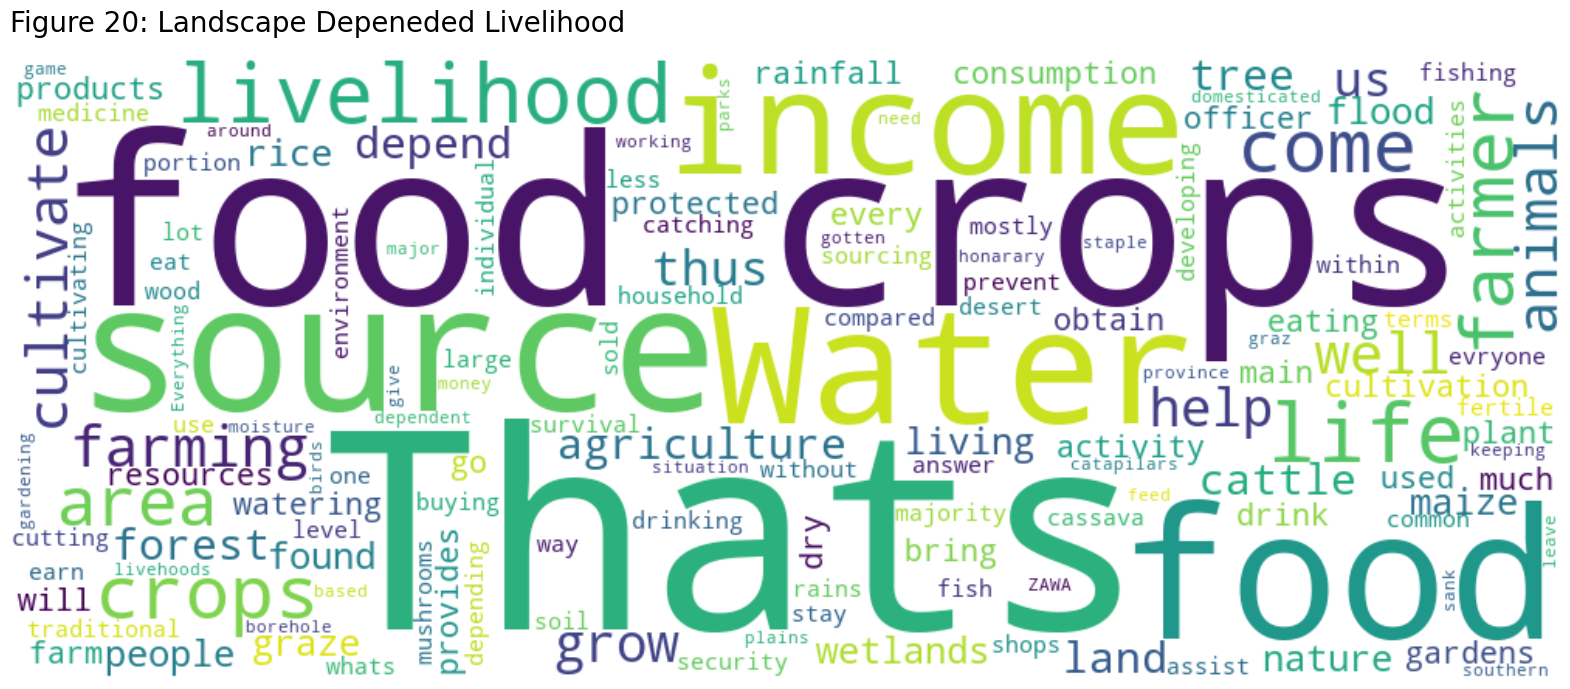

In [87]:
LDL_R1["Landscape_Depeneded_Livelihood_Reasons"] = LDL_R1["Landscape_Depeneded_Livelihood_Reasons"].fillna("")  
LDL_R1["Landscape_Depeneded_Livelihood_Reasons"] = LDL_R1["Landscape_Depeneded_Livelihood_Reasons"].astype(str)
LDL_R1_Text = " ".join(LDL_R1["Landscape_Depeneded_Livelihood_Reasons"])
wordcloud = WordCloud(background_color = "white", width = 1000, height = 400).generate(LDL_R1_Text)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("Figure 20: Landscape Depeneded Livelihood", loc="left", fontsize=20, pad=20)
plt.axis("off")  
plt.show()

## 8.6 Explanation to Choices
 It gives an explanation to the choice selected that is not among the choices that were provided in the list of the questionnaire

In [88]:
df5=df2.drop(df2.columns[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]], axis = 1)

In [97]:
#df5

In [98]:
lemmatizer=WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
for index, row in df5.iterrows():
    PL_RS1_filter_sentence = []
    PL_RS1_sentence = row["Purpose_Landscape_Specific"]
    if pd.isnull(PL_RS1_sentence):
       continue
    PL_RS1_sentence_cleaned = re.sub(r'[^\w\s]','',PL_RS1_sentence)
    PL_RS1_words = nltk.word_tokenize(PL_RS1_sentence_cleaned)
    PL_RS1_words = [lemmatizer.lemmatize(w) for w in PL_RS1_words if w.lower() not in stop_words]
    PL_RS1_filter_sentence.extend(PL_RS1_words)
    print(PL_RS1_filter_sentence)

['protection', 'nature', 'others', 'important']
['fire', 'burn', 'biodiversity', 'allow', 'environmental', 'process']
['tourist', 'bring', 'income', 'term', 'viewing', 'animal']
['source', 'income', 'tourism']


In [99]:
lemmatizer=WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
for index, row in df5.iterrows():
    CN_RS1_filter_sentence = []
    CN_RS1_sentence = row["Connection_Nature_Specific"]
    if pd.isnull(CN_RS1_sentence):
       continue
    CN_RS1_sentence_cleaned = re.sub(r'[^\w\s]','',CN_RS1_sentence)
    CN_RS1_words = nltk.word_tokenize(CN_RS1_sentence_cleaned)
    CN_RS1_words = [lemmatizer.lemmatize(w) for w in CN_RS1_words if w.lower() not in stop_words]
    CN_RS1_filter_sentence.extend(CN_RS1_words)
    print(CN_RS1_filter_sentence)

['Taking', 'care', 'nature', 'without', 'destroying']
['Taking', 'care', 'nature']
['Source', 'good', 'air', 'food', 'product']
['related']
['Protection', 'tree']
['Taking', 'care', 'animal']


In [100]:
lemmatizer=WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
for index, row in df5.iterrows():
    CLT_RS1_filter_sentence = []
    CLT_RS1_sentence = row["Contributor_Landscape_Transformation_Specific"]
    if pd.isnull(CLT_RS1_sentence):
       continue
    CLT_RS1_sentence_cleaned = re.sub(r'[^\w\s]','',CLT_RS1_sentence)
    CLT_RS1_words = nltk.word_tokenize(CLT_RS1_sentence_cleaned)
    CLT_RS1_words = [lemmatizer.lemmatize(w) for w in CLT_RS1_words if w.lower() not in stop_words]
    CLT_RS1_filter_sentence.extend(CLT_RS1_words)
    print(CLT_RS1_filter_sentence)

['Cutting', 'tree', 'sale']


In [101]:
lemmatizer=WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
for index, row in df5.iterrows():
    LDL_RS1_filter_sentence = []
    LDL_RS1_sentence = row["Landscape_Depended_Livelihood_Specific"]
    if pd.isnull(LDL_RS1_sentence):
       continue
    LDL_RS1_sentence_cleaned = re.sub(r'[^\w\s]','',LDL_RS1_sentence)
    LDL_RS1_words = nltk.word_tokenize(LDL_RS1_sentence_cleaned)
    LDL_RS1_words = [lemmatizer.lemmatize(w) for w in LDL_RS1_words if w.lower() not in stop_words]
    LDL_RS1_filter_sentence.extend(LDL_RS1_words)
    print(LDL_RS1_filter_sentence)

## 9. Description Statistics 
    It gives a background to the study sites

In [102]:
df6=df2.drop(df2.columns[[0,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34]], axis = 1)

In [104]:
#df6

[<a href="#Purpose-of-the-Analysis">Back to top</a>]

### 9.1 Main project Types
    This shows the number of questionaires that were administered to each project type

In [105]:
MP = df6['Name_Main_Project'].value_counts(dropna=False)

In [106]:
MP

Name_Main_Project
SCRiKA_LS                               44
TRALARD_LNM                             40
SCRALA_SOUTHERN_WESTERN_NORTHEN         30
SCReBS_WESTERN                          15
Ecosystem Conservation_NORTH_WESTERN    11
PIN_WESTERN                              6
EbA_CENTRAL_MUCHINGA_LUAPULA             3
NaN                                      1
Name: count, dtype: int64

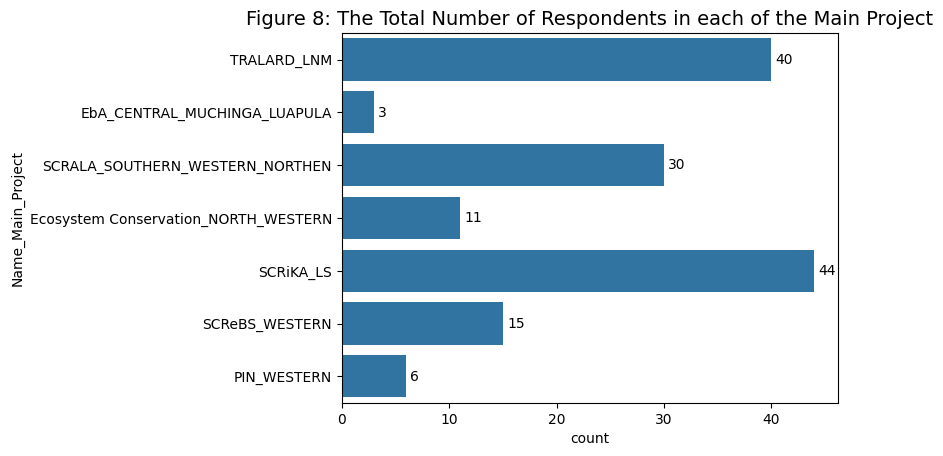

In [107]:
ax = sns.countplot(df6["Name_Main_Project"])
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type="edge", padding=3)
    ax.set_title("Figure 8: The Total Number of Respondents in each of the Main Project", fontsize=14)
plt.show()

### 9.2 The Wards
    The wards that had respodents and their number

In [108]:
WN = df6['Ward_Name'].value_counts(dropna=False)

In [109]:
WN

Ward_Name
Namwala Central ward    17
Omba ward               15
Mbila ward              14
Yeta ward               11
Mwanambuyu ward         11
Lulimala ward           11
Isamba ward             10
Kalobolelwa ward         9
Ntonga ward              8
Kalanga ward             8
Moofwe ward              7
Chitimbwa ward           7
Makuya ward              6
Nachikufu ward           5
Luubwe ward              4
Ntambu ward              4
NaN                      2
Silunga ward             1
Name: count, dtype: int64

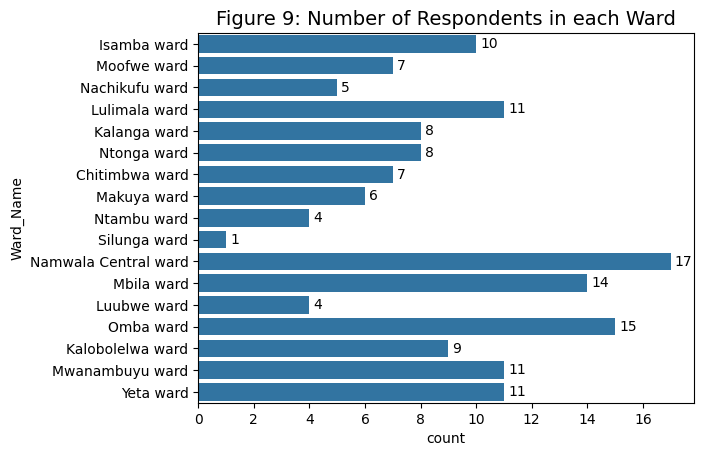

In [110]:
ax = sns.countplot(df6["Ward_Name"])
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type="edge", padding=3)
    ax.set_title("Figure 9: Number of Respondents in each Ward", fontsize=14)
plt.show()

### 9.3 Number of beneficiaries
    It shows the number of households that benefited from the interviewees

In [111]:
NB = df6['Number_Beneficiaries'].value_counts(dropna=False)

In [112]:
NB

Number_Beneficiaries
Greaterthan40People_Many    40
10to20People_Many           25
NaN                         25
20to30People_Many           24
30to40People_Many           23
Lessthan10People_Many       13
Name: count, dtype: int64

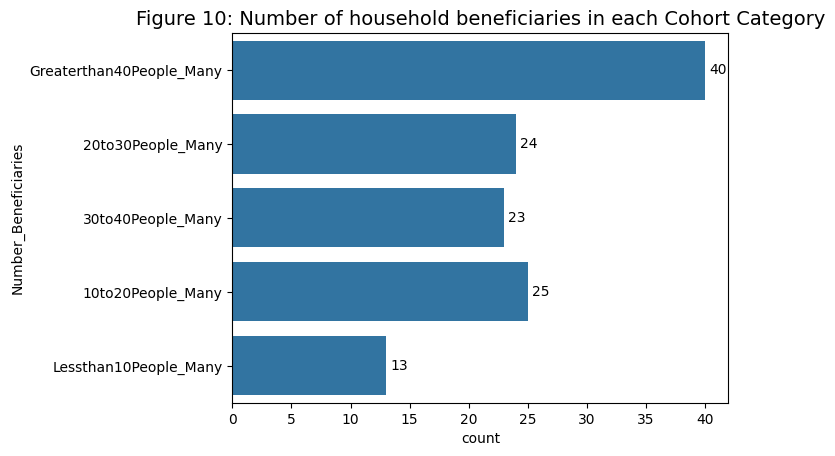

In [113]:
ax = sns.countplot(df6["Number_Beneficiaries"])
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type="edge", padding=3)
    ax.set_title("Figure 10: Number of household beneficiaries in each Cohort Category", fontsize=14)
plt.show()

### 9.4 Size of Landscape

In [114]:
SIZE = df6['Size'].value_counts(dropna=False)

In [115]:
SIZE

Size
Lessthan4Lima_Size        48
Greaterthan16Lima_Size    40
NotApplicable_Size        31
4to8Lima_Size             13
NaN                       10
8to12Lima_Size             5
12to16Lima_Size            3
Name: count, dtype: int64

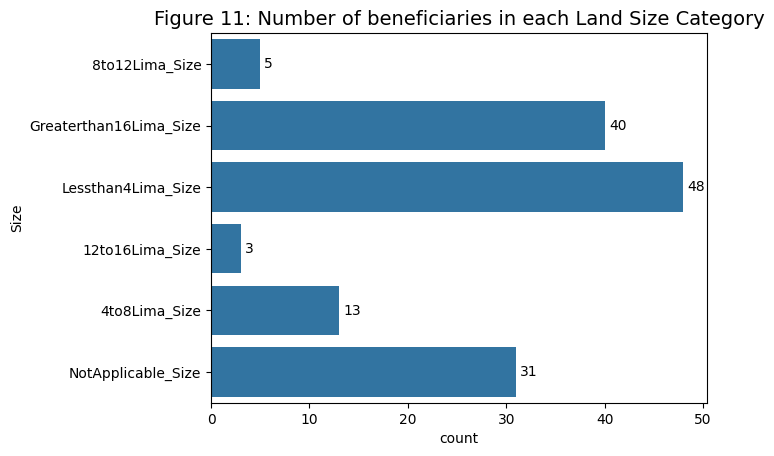

In [116]:
ax = sns.countplot(df6["Size"])
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type="edge", padding=3)
    ax.set_title("Figure 11: Number of beneficiaries in each Land Size Category", fontsize=14)
plt.show()

### 9.5 Represing Others
    It looks at those representing one house and more

In [117]:
RO = df6['Representing_Others'].value_counts(dropna=False)

In [118]:
RO

Representing_Others
yes    125
no      23
NaN      2
Name: count, dtype: int64

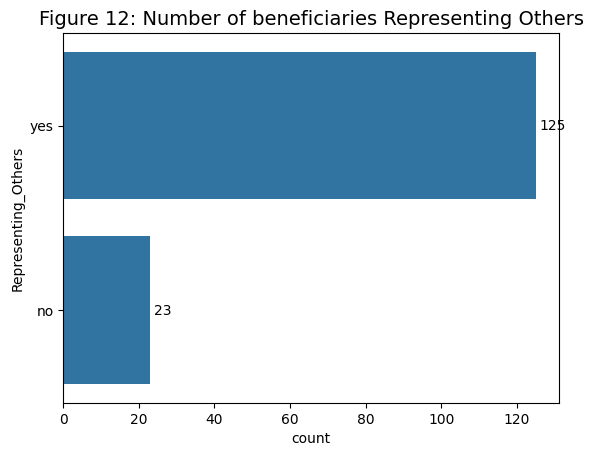

In [119]:
ax = sns.countplot(df6["Representing_Others"])
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type="edge", padding=3)
    ax.set_title("Figure 12: Number of beneficiaries Representing Others", fontsize=14)
plt.show()

[<a href="#Purpose-of-the-Analysis">Back to top</a>]

## 10. Reasons
The pandas dataframe depicts columns for the reasons to the responses to the likert scales

In [120]:
df7=df2.drop(df2.columns[[0,1,2,3,4,5,6,7,8,10,11,13,14,15,17,18,19,20,22,23,24,25,26,27,29,31,32,33,34]], axis = 1)

In [121]:
#df7

### 10.1 Reasons for Cultural Practices Hidering
     The reasons for cultural practices that hinder transfromation

In [124]:
lemmatizer = WordNetLemmatizer()
CPH = df7['Cultural_Practices_Hinder_Reason'].str.lower().str.cat(sep=' ')
CPH_words = nltk.tokenize.word_tokenize(CPH)
CPH_filtered_tokens = [word for word in CPH_words if len(CPH_words) >= 8]
CPH_lemmatized_words = [lemmatizer.lemmatize(word) for word in CPH_filtered_tokens]
CPH_token_counts = Counter(CPH_lemmatized_words)
CPH_columns = pd.DataFrame(CPH_token_counts.most_common(67),
columns = ['Word', 'Frequency'])
#print(CPH_columns)

In [127]:
bigrams_list = list(bigrams(CPH_filtered_tokens))
#print(bigrams_list)
CPH_bigram_counts = Counter(zip(bigrams_list, bigrams_list[1:]))
#print(bigram_counts)  
CPH_bigrams = pd.DataFrame(CPH_bigram_counts.most_common(67),
columns = ['Word', 'Frequency'])
print(CPH_bigrams)

                                           Word  Frequency
0                  ((there, is), (is, nothing))         73
1             ((is, nothing), (nothing, there))         55
2               ((nothing, there), (there, is))         52
3          ((protect, the), (the, environment))          6
4               ((to, protect), (protect, the))          6
5                       ((there, is), (is, no))          5
6                     ((there, are), (are, no))          4
7    ((the, environment), (environment, there))          4
8               ((is, nothing), (nothing, the))          4
9   ((customary, practices), (practices, that))          3
10                     ((as, well), (well, as))          3
11                  ((are, no), (no, cultural))          3
12             ((nothing, there), (there, are))          3
13        ((destroys, the), (the, environment))          3
14                ((cutting, down), (down, of))          3
15          ((environment, there), (there, is))         

In [128]:
trigrams_list = list(trigrams(CPH_filtered_tokens))
#print(bigrams_list)
CPH_trigram_counts = Counter(zip(trigrams_list, trigrams_list[1:]))
#print(bigram_counts)  
CPH_trigrams = pd.DataFrame(CPH_trigram_counts.most_common(67),
columns = ['Word', 'Frequency'])
print(CPH_trigrams)

                                                                     Word  \
0                            ((there, is, nothing), (is, nothing, there))   
1                            ((is, nothing, there), (nothing, there, is))   
2                            ((nothing, there, is), (there, is, nothing))   
3                       ((to, protect, the), (protect, the, environment))   
4                              ((there, is, nothing), (is, nothing, the))   
5                                 ((there, are, no), (are, no, cultural))   
6                           ((is, nothing, there), (nothing, there, are))   
7                   ((the, environment, there), (environment, there, is))   
8                        ((environment, there, is), (there, is, nothing))   
9                                ((there, is, nothing), (is, nothing, i))   
10                                 ((``, '', malende), ('', malende, ''))   
11                                 (('', malende, ''), (malende, '', ''))   

In [129]:
lemmatizer = WordNetLemmatizer()
CAC = df7['Cultural_Aspects_Considered_Reasons'].str.lower().str.cat(sep=' ')
CAC_words = nltk.tokenize.word_tokenize(CAC)
CAC_filtered_tokens = [word for word in CAC_words if len(CAC_words) >= 4]
CAC_lemmatized_words = [lemmatizer.lemmatize(word) for word in CAC_filtered_tokens]
CAC_token_counts = Counter(CAC_lemmatized_words)
CAC_columns = pd.DataFrame(CAC_token_counts.most_common(67),
columns = ['Word', 'Frequency'])
print(CAC_columns)

           Word  Frequency
0           the         73
1           not         52
2            is         51
3            we         47
4         there         45
5       nothing         39
6            do         36
7            to         23
8           are         23
9            it         17
10      project         15
11         that         13
12           of         13
13     cultural         12
14         have         11
15          can         11
16     included         11
17         they         11
18           no         10
19           in         10
20            a         10
21      because         10
22  traditional          8
23       aspect          7
24       follow          7
25     practice          7
26          and          6
27           be          6
28           if          6
29          our          6
30          for          5
31         from          5
32      include          5
33   considered          5
34         what          4
35           so          4
3

In [130]:
CAC_bigrams_list = list(bigrams(CAC_filtered_tokens))
#print(bigrams_list)
CAC_bigram_counts = Counter(zip(CAC_bigrams_list, CAC_bigrams_list[1:]))
#print(bigram_counts)  
CAC_bigrams = pd.DataFrame(CAC_bigram_counts.most_common(67),
columns = ['Word', 'Frequency'])
print(CAC_bigrams)

                                              Word  Frequency
0                     ((there, is), (is, nothing))         33
1                            ((we, do), (do, not))         26
2                   ((is, nothing), (nothing, we))          9
3                        ((nothing, we), (we, do))          9
4                ((is, nothing), (nothing, there))          8
5                  ((nothing, there), (there, is))          7
6                           ((do, not), (not, do))          7
7                      ((do, not), (not, include))          5
8                        ((they, are), (are, not))          5
9                            ((not, do), (do, it))          5
10          ((the, cultural), (cultural, aspects))          5
11                   ((are, not), (not, included))          4
12                       ((there, are), (are, no))          3
13                 ((is, nothing), (nothing, the))          3
14  ((the, traditional), (traditional, authority))          3
15      

In [131]:
CAC_trigrams_list = list(trigrams(CAC_filtered_tokens))
#print(bigrams_list)
CAC_trigram_counts = Counter(zip(CAC_trigrams_list, CAC_trigrams_list[1:]))
#print(bigram_counts)  
CAC_trigrams = pd.DataFrame(CAC_trigram_counts.most_common(67),
columns = ['Word', 'Frequency'])
print(CAC_trigrams)

                                                    Word  Frequency
0              ((there, is, nothing), (is, nothing, we))          9
1                     ((nothing, we, do), (we, do, not))          9
2                 ((is, nothing, we), (nothing, we, do))          8
3           ((there, is, nothing), (is, nothing, there))          7
4           ((is, nothing, there), (nothing, there, is))          7
5           ((nothing, there, is), (there, is, nothing))          7
6                         ((we, do, not), (do, not, do))          7
7                    ((we, do, not), (do, not, include))          5
8                         ((do, not, do), (not, do, it))          5
9             ((there, is, nothing), (is, nothing, the))          3
10  ((the, cultural, aspects), (cultural, aspects, are))          3
11             ((not, included, we), (included, we, do))          3
12                   ((included, we, do), (we, do, not))          3
13             ((there, is, nothing), (is, nothi

In [132]:
lemmatizer = WordNetLemmatizer()
CoN = df7['Connection_Nature_Reasons'].str.lower().str.cat(sep=' ')
CoN_words = nltk.tokenize.word_tokenize(CoN)
CoN_filtered_tokens = [word for word in CoN_words if len(CoN_words) >= 4]
CoN_lemmatized_words = [lemmatizer.lemmatize(word) for word in CoN_filtered_tokens]
CoN_token_counts = Counter(CoN_lemmatized_words)
CoN_columns = pd.DataFrame(CoN_token_counts.most_common(67),
columns = ['Word', 'Frequency'])
#print(CoN_columns)

In [133]:
CoN_bigrams_list = list(bigrams(CoN_filtered_tokens))
#print(bigrams_list)
CoN_bigram_counts = Counter(zip(CoN_bigrams_list, CoN_bigrams_list[1:]))
#print(bigram_counts)  
CoN_bigrams = pd.DataFrame(CoN_bigram_counts.most_common(67),
columns = ['Word', 'Frequency'])
print(CoN_bigrams)

                                           Word  Frequency
0                  ((source, of), (of, income))         11
1                   ((a, source), (source, of))          9
2                      ((as, well), (well, as))          5
3                       ((they, are), (are, a))          5
4                       ((are, a), (a, source))          5
5                ((of, income), (income, they))          3
6        ((the, natural), (natural, resources))          3
7              ((the, animals), (animals, can))          2
8                   ((animals, can), (can, be))          2
9                       ((can, be), (be, used))          2
10        ((the, future), (future, generation))          2
11                ((income, they), (they, are))          2
12     ((future, generation), (generation, to))          2
13               ((them, source), (source, of))          2
14                          ((it, is), (is, a))          2
15                       ((is, a), (a, source))         

In [134]:
CoN_trigrams_list = list(trigrams(CoN_filtered_tokens))
#print(bigrams_list)
CoN_trigram_counts = Counter(zip(CoN_trigrams_list, CoN_trigrams_list[1:]))
#print(bigram_counts)  
CoN_trigrams = pd.DataFrame(CoN_trigram_counts.most_common(67),
columns = ['Word', 'Frequency'])
print(CoN_trigrams)

                                                          Word  Frequency
0                      ((a, source, of), (source, of, income))          6
1                           ((they, are, a), (are, a, source))          5
2                          ((are, a, source), (a, source, of))          5
3                   ((source, of, income), (of, income, they))          3
4                    ((the, animals, can), (animals, can, be))          2
5                        ((animals, can, be), (can, be, used))          2
6                   ((them, source, of), (source, of, income))          2
7                               ((it, is, a), (is, a, source))          2
8                           ((is, a, source), (a, source, of))          2
9                          ((there, is, need), (is, need, to))          2
10                 ((a, source, of), (source, of, livelihood))          2
11                   ((source, of, income), (of, income, the))          2
12                        ((source, of

In [136]:
lemmatizer = WordNetLemmatizer()
CLE = df7['Change_Livelihood_Easy_Reasons'].str.lower().str.cat(sep=' ')
CLE_words = nltk.tokenize.word_tokenize(CLE)
CLE_filtered_tokens = [word for word in CLE_words if len(CLE_words) >= 4]
CLE_lemmatized_words = [lemmatizer.lemmatize(word) for word in CLE_filtered_tokens]
CLE_token_counts = Counter(CLE_lemmatized_words)
CLE_columns = pd.DataFrame(CLE_token_counts.most_common(67),
columns = ['Word', 'Frequency'])
#print(CLE_columns)

In [137]:
CLE_bigrams_list = list(bigrams(CLE_filtered_tokens))
#print(bigrams_list)
CLE_bigram_counts = Counter(zip(CLE_bigrams_list, CLE_bigrams_list[1:]))
#print(bigram_counts)  
CLE_bigrams = pd.DataFrame(CLE_bigram_counts.most_common(67),
columns = ['Word', 'Frequency'])
print(CLE_bigrams)

                                         Word  Frequency
0                    ((as, long), (long, as))         14
1                         ((it, is), (is, a))          7
2           ((to, change), (change, because))          6
3                   ((long, as), (as, there))          6
4                  ((need, to), (to, change))          5
5                  ((we, can), (can, change))          5
6                ((we, depend), (depend, on))          5
7                       ((we, do), (do, not))          5
8                   ((there, is), (is, need))          4
9      ((the, natural), (natural, resources))          4
10                   ((as, well), (well, as))          4
11                   ((it, is), (is, easier))          4
12                ((if, there), (there, are))          4
13                 ((as, there), (there, is))          4
14                   ((do, not), (not, have))          4
15                  ((is, a), (a, challenge))          4
16         ((of, climate), (cli

In [138]:
CLE_trigrams_list = list(trigrams(CLE_filtered_tokens))
#print(bigrams_list)
CLE_trigram_counts = Counter(zip(CLE_trigrams_list, CLE_trigrams_list[1:]))
#print(bigram_counts)  
CLE_trigrams = pd.DataFrame(CLE_trigram_counts.most_common(67),
columns = ['Word', 'Frequency'])
print(CLE_trigrams)

                                                    Word  Frequency
0                    ((as, long, as), (long, as, there))          6
1                   ((long, as, there), (as, there, is))          4
2                      ((it, is, a), (is, a, challenge))          4
3                ((we, can, change), (can, change, the))          3
4                    ((there, is, need), (is, need, to))          3
5                   ((is, need, to), (need, to, change))          3
6                        ((as, long, as), (long, as, i))          3
7                         ((long, as, i), (as, i, have))          3
8                       ((we, do, not), (do, not, have))          3
9                       ((as, long, as), (long, as, we))          3
10                ((need, to, change), (to, change, to))          2
11         ((change, is, easier), (is, easier, because))          2
12               ((to, change, if), (change, if, there))          2
13                ((change, if, there), (if, the

In [159]:
lemmatizer = WordNetLemmatizer()
CLT = df7['Contributor_Landscape_Transformation_Reasons'].str.lower().str.cat(sep=' ')
CLT_words = nltk.tokenize.word_tokenize(CLT)
CLT_filtered_tokens = [word for word in CLT_words if len(CLT_words) >= 4]
CLT_lemmatized_words = [lemmatizer.lemmatize(word) for word in CLT_filtered_tokens]
CLT_token_counts = Counter(CLT_lemmatized_words)
CLT_columns = pd.DataFrame(CLT_token_counts.most_common(67),
columns = ['Word', 'Frequency'])
#print(CLT_columns)

In [160]:
CLT_bigrams_list = list(bigrams(CLT_filtered_tokens))
#print(bigrams_list)
CLT_bigram_counts = Counter(zip(CLT_bigrams_list, CLT_bigrams_list[1:]))
#print(bigram_counts)  
CLT_bigrams = pd.DataFrame(CLT_bigram_counts.most_common(67),
columns = ['Word', 'Frequency'])
print(CLT_bigrams)

                                               Word  Frequency
0                          ((as, well), (well, as))          8
1                             ((a, lot), (lot, of))          6
2                      ((source, of), (of, income))          5
3                           ((there, is), (is, no))          4
4                        ((is, the), (the, source))          4
5                     ((the, source), (source, of))          4
6                 ((the, cutting), (cutting, down))          4
7                         ((a, huge), (huge, area))          4
8                   ((trees, for), (for, charcoal))          4
9                         ((lot, of), (of, things))          4
10                  ((the, fire), (fire, destroys))          4
11                ((it, destroys), (destroys, the))          4
12                      ((when, the), (the, trees))          4
13                     ((the, trees), (trees, are))          4
14                       ((trees, are), (are, cut))    

In [161]:
CLT_trigrams_list = list(trigrams(CLT_filtered_tokens))
#print(bigrams_list)
CLT_trigram_counts = Counter(zip(CLT_trigrams_list, CLT_trigrams_list[1:]))
#print(bigram_counts)  
CLT_trigrams = pd.DataFrame(CLT_trigram_counts.most_common(67),
columns = ['Word', 'Frequency'])
print(CLT_trigrams)

                                                           Word  Frequency
0                        ((is, the, source), (the, source, of))          4
1                   ((the, cutting, down), (cutting, down, of))          3
2                             ((as, well, as), (well, as, the))          3
3                             ((a, lot, of), (lot, of, things))          3
4                            ((destroys, a, lot), (a, lot, of))          3
5                       ((when, the, trees), (the, trees, are))          3
6                        ((the, trees, are), (trees, are, cut))          3
7                        ((requires, a, huge), (a, huge, land))          2
8                                ((it, is, a), (is, a, source))          2
9                            ((is, a, source), (a, source, of))          2
10                    ((the, source, of), (source, of, income))          2
11                   ((source, of, income), (of, income, some))          2
12                       

In [162]:
lemmatizer = WordNetLemmatizer()
LDL = df7['Landscape_Depeneded_Livelihood_Reasons'].str.lower().str.cat(sep=' ')
LDL_words = nltk.tokenize.word_tokenize(LDL)
LDL_filtered_tokens = [word for word in LDL_words if len(LDL_words) >= 4]
LDL_lemmatized_words = [lemmatizer.lemmatize(word) for word in LDL_filtered_tokens]
LDL_token_counts = Counter(LDL_lemmatized_words)
LDL_columns = pd.DataFrame(LDL_token_counts.most_common(67),
columns = ['Word', 'Frequency'])
#print(LDL_columns)

In [163]:
LDL_bigrams_list = list(bigrams(LDL_filtered_tokens))
#print(bigrams_list)
LDL_bigram_counts = Counter(zip(LDL_bigrams_list, LDL_bigrams_list[1:]))
#print(bigram_counts)  
LDL_bigrams = pd.DataFrame(LDL_bigram_counts.most_common(67),
columns = ['Word', 'Frequency'])
print(LDL_bigrams)

                                    Word  Frequency
0               ((where, we), (we, get))         17
1          ((thats, where), (where, we))         16
2               ((we, get), (get, food))         16
3            ((a, source), (source, of))         12
4              ((water, is), (is, life))         11
5            ((thats, were), (were, we))         10
6                ((were, we), (we, get))          9
7            ((we, are), (are, farmers))          9
8               ((as, well), (well, as))          7
9           ((get, food), (food, crops))          7
10          ((source, of), (of, income))          6
11                ((is, a), (a, source))          6
12               ((we, get), (get, our))          6
13       ((food, crops), (crops, thats))          6
14          ((our, food), (food, crops))          6
15            ((is, the), (the, source))          5
16         ((the, source), (source, of))          5
17            ((source, of), (of, food))          5
18          

In [164]:
LDL_trigrams_list = list(trigrams(LDL_filtered_tokens))
#print(bigrams_list)
LDL_trigram_counts = Counter(zip(LDL_trigrams_list, LDL_trigrams_list[1:]))
#print(bigram_counts)  
LDL_trigrams = pd.DataFrame(LDL_trigram_counts.most_common(67),
columns = ['Word', 'Frequency'])
print(LDL_trigrams)

                                                        Word  Frequency
0                     ((thats, where, we), (where, we, get))         14
1                        ((where, we, get), (we, get, food))         11
2                      ((we, get, food), (get, food, crops))          7
3                         ((is, a, source), (a, source, of))          6
4                       ((thats, were, we), (were, we, get))          6
5                     ((is, the, source), (the, source, of))          5
6                    ((source, of, food), (of, food, crops))          5
7                         ((were, we, get), (we, get, food))          4
8                         ((where, we, get), (we, get, our))          4
9                         ((we, get, our), (get, our, food))          4
10             ((food, crops, thats), (crops, thats, where))          4
11               ((crops, thats, where), (thats, where, we))          4
12               ((we, are, farmers), (are, farmers, thats))    

[<a href="#Purpose-of-the-Analysis">Back to top</a>]

## 11. Specific Variables

### 11.1 Main Project and Cultural Practices
The responses are grouped in line with the main projects
There is also the grouping of responses of those that agreed and storngly agreed in one dataframe as well as those whose responses were strongly disagreed and disagreed  
The text responses in form of reasons are tokenized and lammentized  

In [165]:
CPH_grouped = df2.groupby('Name_Main_Project')['Cultural_Practices_Hinder'].value_counts(dropna=False)

In [166]:
CPH_grouped

Name_Main_Project                     Cultural_Practices_Hinder
EbA_CENTRAL_MUCHINGA_LUAPULA          Strongly_Agree_Likert         2
                                      Strongly_Disagree_Likert      1
Ecosystem Conservation_NORTH_WESTERN  Strongly_Disagree_Likert      5
                                      Strongly_Agree_Likert         2
                                      NaN                           2
                                      Agree_Likert                  1
                                      Disagree_Likert               1
PIN_WESTERN                           Strongly_Disagree_Likert      5
                                      NaN                           1
SCRALA_SOUTHERN_WESTERN_NORTHEN       Disagree_Likert              11
                                      Strongly_Disagree_Likert      9
                                      Agree_Likert                  5
                                      Strongly_Agree_Likert         2
                          

In [167]:
CPH_grouped1 = pd.DataFrame(CPH_grouped)

In [168]:
CPH_grouped1

count
Name_Main_Project                    Cultural_Practices_Hinder       
EbA_CENTRAL_MUCHINGA_LUAPULA         Strongly_Agree_Likert          2
                                     Strongly_Disagree_Likert       1
Ecosystem Conservation_NORTH_WESTERN Strongly_Disagree_Likert       5
                                     Strongly_Agree_Likert          2
                                     NaN                            2
                                     Agree_Likert                   1
                                     Disagree_Likert                1
PIN_WESTERN                          Strongly_Disagree_Likert       5
                                     NaN                            1
SCRALA_SOUTHERN_WESTERN_NORTHEN      Disagree_Likert               11
                                     Strongly_Disagree_Likert       9
                                     Agree_Likert                   5
                                     Strongly_Agree_Likert          2
                                     Undecided_Likert               2
                                     NaN                            1
SCReBS_WESTERN                       Strongly_Disagree_Likert      14
                                     Agree_Likert                   1
SCRiKA_LS                            Strongly_Disagree_Likert      20
                                     Disagree_Likert                6
                                     NaN                            6
                                     Agree_Likert                   5
                                     Strongly_Agree_Likert          5
                                     Undecided_Likert               2
TRALARD_LNM                          Strongly_Disagree_Likert      16
                                     Strongly_Agree_Likert         10
                                     Agree_Likert                   8
                                     Disagree_Likert                4
                                     NaN                            2

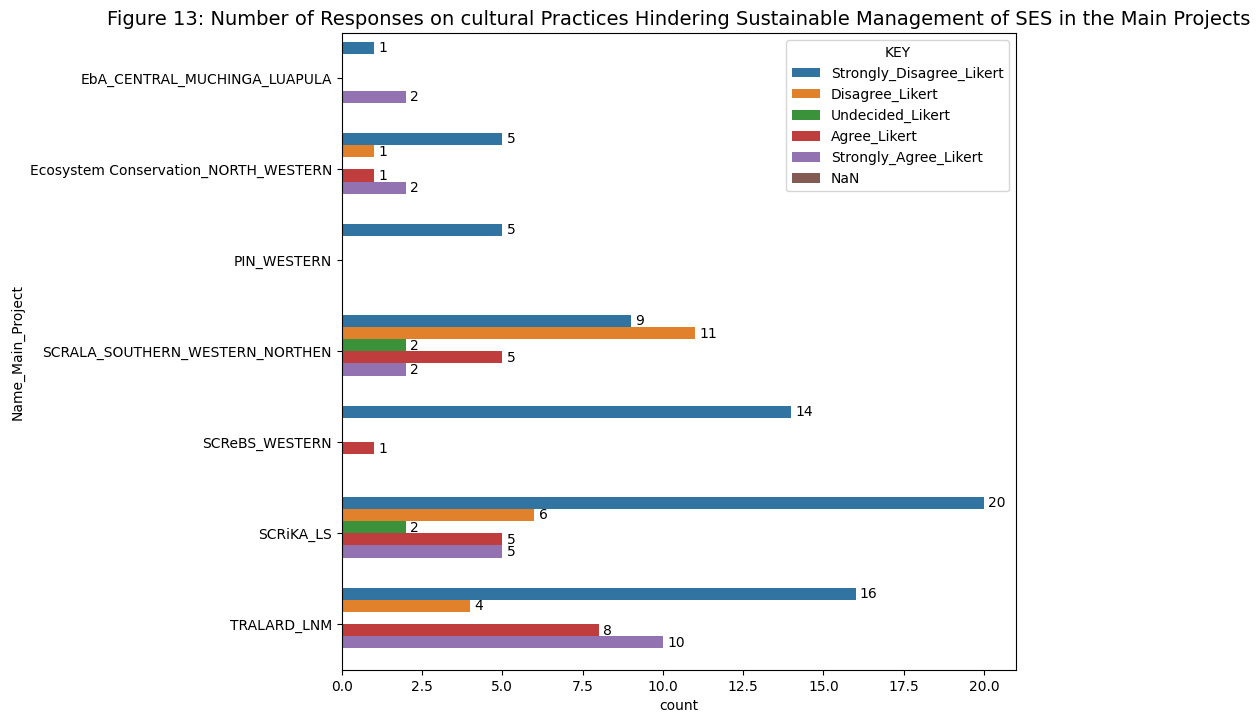

In [169]:
plt.figure(figsize=(8.7, 8.27))
hue_order = ["Strongly_Disagree_Likert", "Disagree_Likert", "Undecided_Likert", "Agree_Likert", "Strongly_Agree_Likert", "NaN"]
ax = sns.barplot(data = CPH_grouped1, x="count", y="Name_Main_Project", hue="Cultural_Practices_Hinder", hue_order=hue_order, legend=True)
ax.set_title("Figure 13: Number of Responses on cultural Practices Hindering Sustainable Management of SES in the Main Projects", fontsize=14)
plt.legend(title="KEY")
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type="edge", padding=3)
plt.show()

In [170]:
agreement_levels = ["Agree_Likert", "Strongly_Agree_Likert"]
CPH_R = df2[df2["Cultural_Practices_Hinder"].isin(agreement_levels)]

In [171]:
CPH_R1 = CPH_R.drop(CPH_R.columns[[0,1,2,3,4,6,7,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34]], axis = 1)
CPH_R1grouped = CPH_R1.groupby('Name_Main_Project')['Cultural_Practices_Hinder']
#CPH_R1

In [172]:
lemmatizer=WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
for index, row in CPH_R1.iterrows():
    CPH_R1_filter_sentence = []
    CPH_R1_sentence = row["Cultural_Practices_Hinder_Reason"]
    if pd.isnull(CPH_R1_sentence):
       continue
    CPH_R1_sentence_cleaned = re.sub(r'[^\w\s]','',CPH_R1_sentence)
    CPH_R1_words = nltk.word_tokenize(CPH_R1_sentence_cleaned)
    CPH_R1_words = [lemmatizer.lemmatize(w) for w in CPH_R1_words if w.lower() not in stop_words]
    CPH_R1_filter_sentence.extend(CPH_R1_words)
    print(CPH_R1_filter_sentence)

['need', 'harvest', 'tree', 'fully', 'grown', 'applies', 'biodiversity']
['crop', 'rotation', 'made', 'land', 'cultivating', 'ensure', 'fertility', 'soil']
['allowed', 'cultivate', 'area', '3', 'year', 'shifting', 'another', 'area']
['rule', 'chief', 'ensure', 'harvesting', 'period', 'followed', 'well', 'period', 'burning', 'bush']
['norm', 'bush', 'burned', 'dry', 'bush', 'completely', 'burn', 'also', 'support', 'quick', 'regermination', 'vegetation', 'tree']
['nothing']
['never', 'heard', 'learnt']
['cutting', 'tree', 'along', 'river', 'allowed']
['act', 'late', 'burning', 'destroys', 'environment', 'people', 'community', 'would', 'want', 'catch', 'Catapilars', 'consumption', 'sale']
['long', 'time', 'ago', 'people', 'poor', 'management', 'natural', 'moment', 'practice', 'maintain', 'biodiversity']
['cultural', 'practice', 'future', 'generation', 'know', 'anything']
['customary', 'practice', 'promote', 'early', 'burning', 'people', 'tend', 'burn', 'late']
['unregulated', 'allocation'

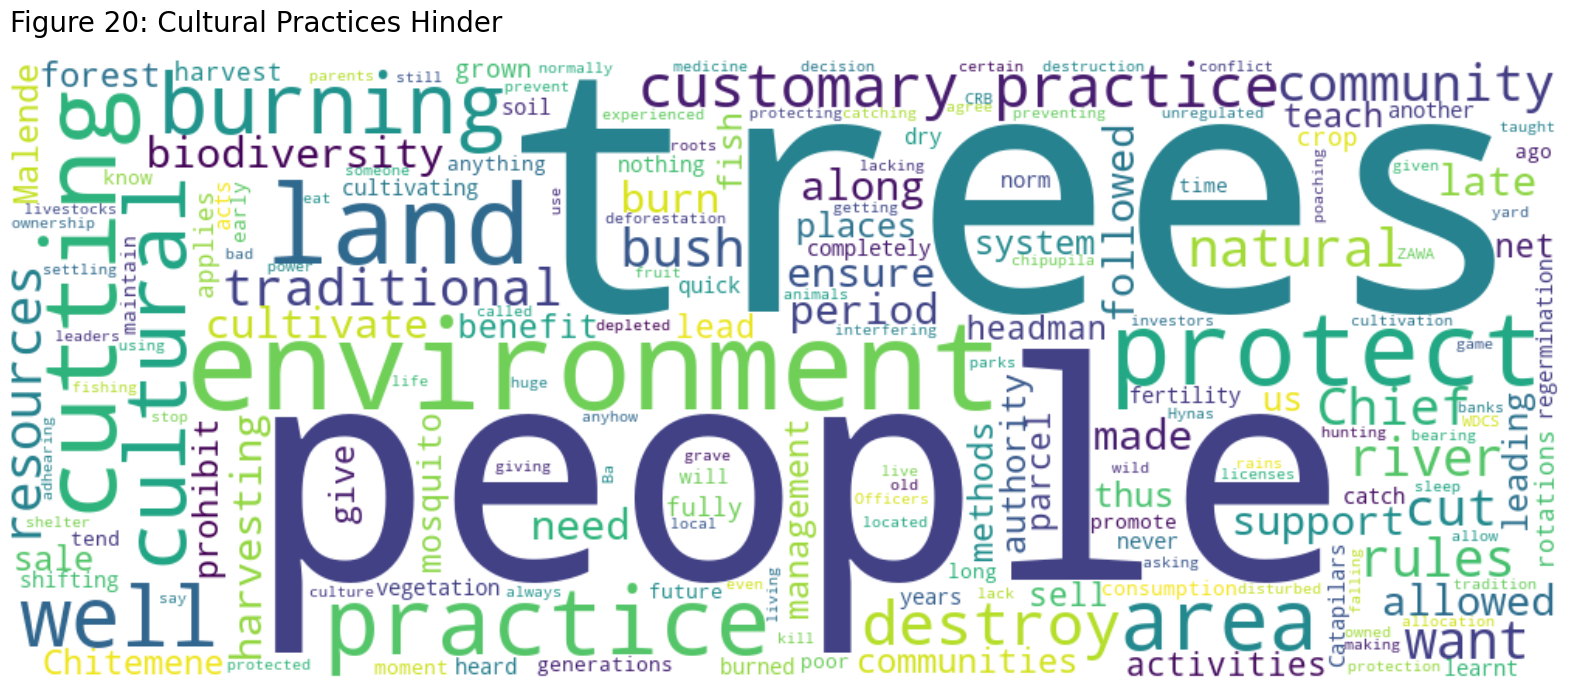

In [173]:
CPH_R1["Cultural_Practices_Hinder_Reason"] = CPH_R1["Cultural_Practices_Hinder_Reason"].fillna("")  
CPH_R1["Cultural_Practices_Hinder_Reason"] = CPH_R1["Cultural_Practices_Hinder_Reason"].astype(str)
CPH_R1_Text = " ".join(CPH_R1["Cultural_Practices_Hinder_Reason"])
wordcloud = WordCloud(background_color = "white", width = 1000, height = 400).generate(CPH_R1_Text)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("Figure 20: Cultural Practices Hinder", loc="left", fontsize=20, pad=20)
plt.axis("off")  
plt.show()

In [174]:
agreement_levels = ["Disagree_Likert", "Strongly_Disagree_Likert"]
CPH_R2 = df2[df2["Cultural_Practices_Hinder"].isin(agreement_levels)]

In [175]:
CPH_R3 = CPH_R2.drop(CPH_R2.columns[[0,1,2,3,4,6,7,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34]], axis = 1)
CPH_R3grouped = CPH_R3.groupby('Name_Main_Project')['Cultural_Practices_Hinder']
#CPH_R3

In [176]:
lemmatizer=WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
for index, row in CPH_R3.iterrows():
    CPH_R3_filter_sentence = []
    CPH_R3_sentence = row["Cultural_Practices_Hinder_Reason"]
    if pd.isnull(CPH_R3_sentence):
       continue
    CPH_R3_sentence_cleaned = re.sub(r'[^\w\s]','',CPH_R3_sentence)
    CPH_R3_words = nltk.word_tokenize(CPH_R3_sentence_cleaned)
    CPH_R3_words = [lemmatizer.lemmatize(w) for w in CPH_R3_words if w.lower() not in stop_words]
    CPH_R3_filter_sentence.extend(CPH_R3_words)
    print(CPH_R3_filter_sentence)

['never', 'happed', 'life', 'time']
['customary', 'practice', 'hinder', 'sustainable', 'management']
['nothing']
['nothing']
['nothing']
['nothing']
['nothing']
['cultural', 'history', 'within', 'community', 'except', 'governmnet']
['cultural', 'norm']
['nothing']
['nothing']
['nothing']
['customary', 'practice', 'protect', 'environment', 'like', 'way', 'ZAWA', 'protects', 'biodiversity']
['chitemene', 'system', 'customary', 'practice', 'destroys', 'environment']
['cultural', 'practice', 'burn', 'bush', 'certain', 'period', 'harvesting']
['cultural', 'practice']
['nothing']
['nothing']
['nothing']
['nothing']
['nothing']
['nothing']
['nothing']
['nothing']
['nothinhg']
['traditional', 'practice', 'government', 'guide', 'u']
['nothing']
['nothing']
['nothing', 'SES', 'looked', 'game', 'park', 'officer', 'officer', 'mandated']
['nothing']
['nothing']
['nothing']
['nothing']
['nothing']
['nothing']
['traditional', 'way', 'management', 'stopped', 'government', 'taken', 'management', 'fores

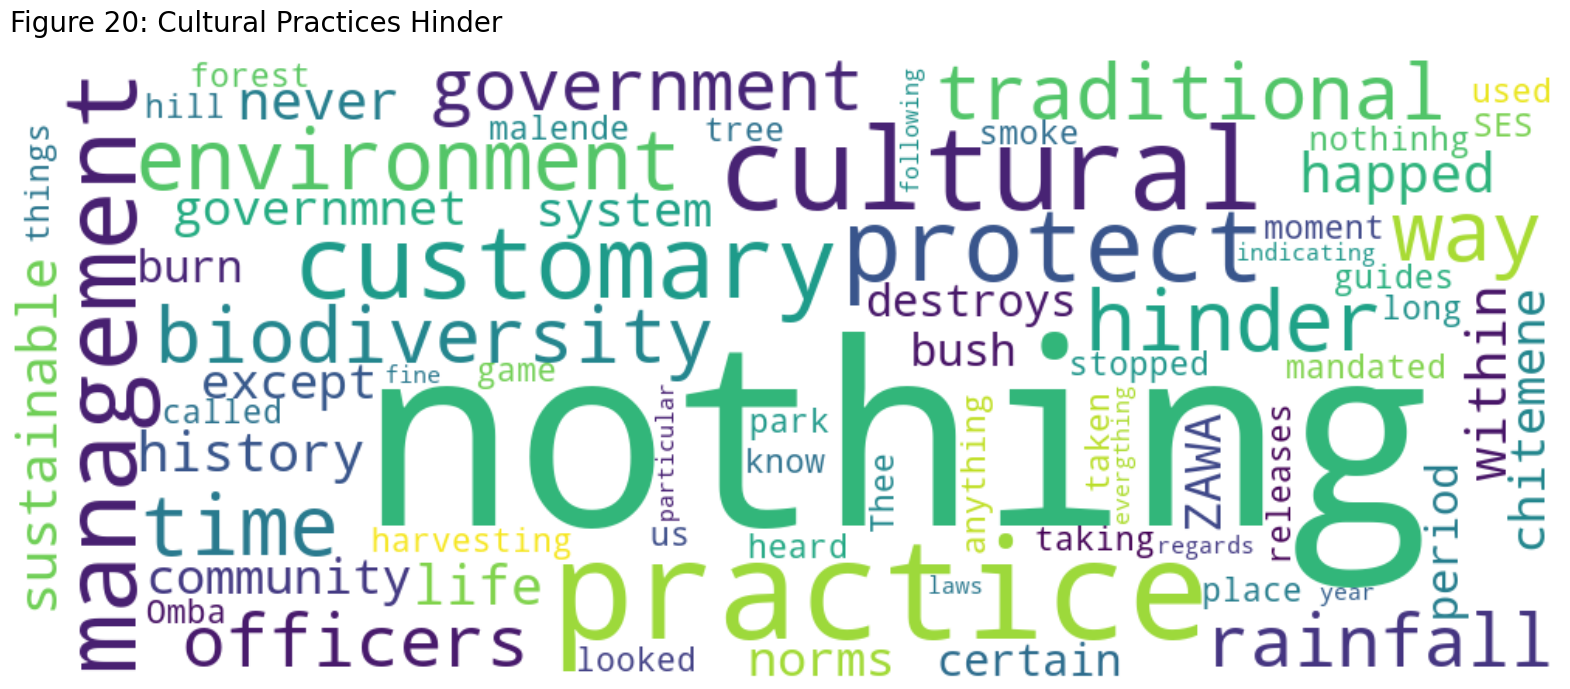

In [177]:
CPH_R3["Cultural_Practices_Hinder_Reason"] = CPH_R3["Cultural_Practices_Hinder_Reason"].fillna("")  
CPH_R3["Cultural_Practices_Hinder_Reason"] = CPH_R3["Cultural_Practices_Hinder_Reason"].astype(str)
CPH_R3_Text = " ".join(CPH_R3["Cultural_Practices_Hinder_Reason"])
wordcloud = WordCloud(background_color = "white", width = 1000, height = 400).generate(CPH_R3_Text)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("Figure 20: Cultural Practices Hinder", loc="left", fontsize=20, pad=20)
plt.axis("off")  
plt.show()

### 11.2 Main Project and Cultural Practices Changed

In [178]:
CPC_grouped = df2.groupby('Name_Main_Project')['Cultural_Practices_Changed'].value_counts(dropna=False)

In [179]:
CPC_grouped

Name_Main_Project                     Cultural_Practices_Changed
EbA_CENTRAL_MUCHINGA_LUAPULA          Strongly_Agree_Likert          1
                                      Strongly_Disagree_Likert       1
                                      Undecided_Likert               1
Ecosystem Conservation_NORTH_WESTERN  NaN                            5
                                      Strongly_Agree_Likert          4
                                      Strongly_Disagree_Likert       2
PIN_WESTERN                           Strongly_Disagree_Likert       4
                                      Strongly_Agree_Likert          1
                                      NaN                            1
SCRALA_SOUTHERN_WESTERN_NORTHEN       Agree_Likert                  11
                                      Disagree_Likert                7
                                      Strongly_Disagree_Likert       4
                                      Undecided_Likert               4
            

In [180]:
CPC_grouped1 = pd.DataFrame(CPC_grouped)

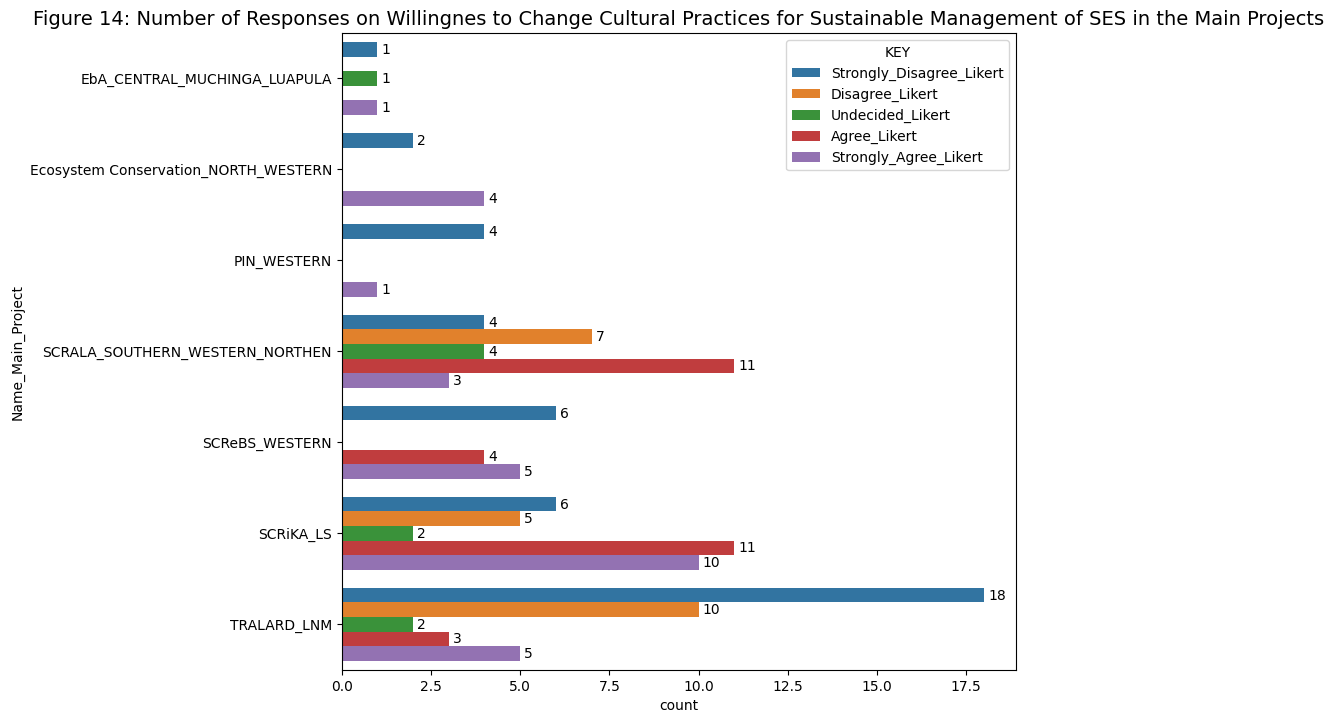

In [181]:
plt.figure(figsize=(8.7, 8.27))
hue_order = ["Strongly_Disagree_Likert", "Disagree_Likert", "Undecided_Likert", "Agree_Likert", "Strongly_Agree_Likert"]
ax = sns.barplot(data = CPC_grouped1, x="count", y="Name_Main_Project", hue="Cultural_Practices_Changed", hue_order=hue_order, legend=True)
ax.set_title("Figure 14: Number of Responses on Willingnes to Change Cultural Practices for Sustainable Management of SES in the Main Projects", fontsize=14)
plt.legend(title="KEY")
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type="edge", padding=3)
plt.show()

### 11.3 Main project and Cultural Aspects Considered

In [182]:
CAC_grouped = df2.groupby('Name_Main_Project')['Cultural_Aspects_Considered'].value_counts(dropna=False)

In [183]:
CAC_grouped1 = pd.DataFrame(CAC_grouped)

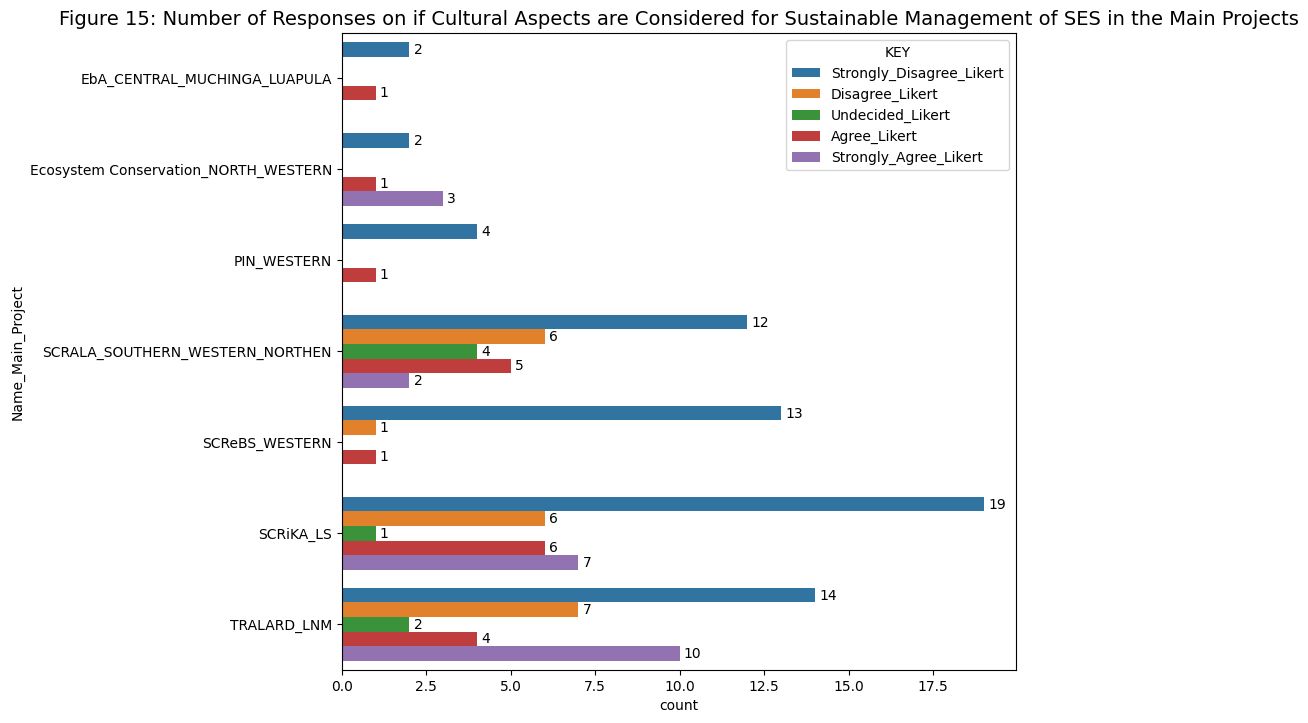

In [184]:
plt.figure(figsize=(8.7, 8.27))
hue_order = ["Strongly_Disagree_Likert", "Disagree_Likert", "Undecided_Likert", "Agree_Likert", "Strongly_Agree_Likert"]
ax = sns.barplot(data = CAC_grouped1, x="count", y="Name_Main_Project", hue="Cultural_Aspects_Considered", hue_order=hue_order, legend=True)
ax.set_title("Figure 15: Number of Responses on if Cultural Aspects are Considered for Sustainable Management of SES in the Main Projects", fontsize=14)
plt.legend(title="KEY")
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type="edge", padding=3)
plt.show()

In [186]:
agreement_levels = ["Agree_Likert", "Strongly_Agree_Likert"]
CAC_R = df2[df2["Cultural_Aspects_Considered"].isin(agreement_levels)]
CAC_R1 = CAC_R.drop(CPH_R.columns[[0,1,2,3,4,6,7,8,9,10,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34]], axis = 1)
CAC_R1grouped = CAC_R1.groupby('Name_Main_Project')['Cultural_Aspects_Considered']
#CAC_R1

In [187]:
lemmatizer=WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
for index, row in CAC_R1.iterrows():
    CAC_R1_filter_sentence = []
    CAC_R1_sentence = row["Cultural_Aspects_Considered_Reasons"]
    if pd.isnull(CAC_R1_sentence):
       continue
    CAC_R1_sentence_cleaned = re.sub(r'[^\w\s]','',CAC_R1_sentence)
    CAC_R1_words = nltk.word_tokenize(CAC_R1_sentence_cleaned)
    CAC_R1_words = [lemmatizer.lemmatize(w) for w in CAC_R1_words if w.lower() not in stop_words]
    CAC_R1_filter_sentence.extend(CAC_R1_words)
    print(CAC_R1_filter_sentence)

['need', 'power', 'formulated', 'ownership']
['time', 'getting', 'land', 'project', 'come', 'regulation']
['rule', 'along', 'river', 'bank', 'tree', 'need', 'cut']
['sometimes', 'give', 'Chiefs', 'harvest', 'collect', 'produce', 'accounted']
['nothing', 'thing', 'ended', 'long', 'time', 'ago', 'Chiefs', 'would', 'talk', 'spirit', 'protect', 'land']
['included']
['customary', 'practice', 'natural', 'resource', 'get', 'destroyed']
['answer']
['answer']
['done', 'product', 'project', 'work', 'well']
['follow', 'customary', 'practice', 'people', 'burn', 'late', 'inorder']
['livelihood', 'improve']
['follow', 'historical', 'practice', 'forefather']
['cultural', 'practice', 'spririal', 'rite', 'done', 'traditional', 'authority']
['accessing', 'land', 'traditional', 'authority', 'also', 'give', 'instruction', 'put', 'livelihood', 'close', 'water', 'source', 'resource']
['project', 'operate', 'without', 'consulting', 'traditional', 'authority']
['answer']
['Sometimes', 'discus', 'locally', 'an

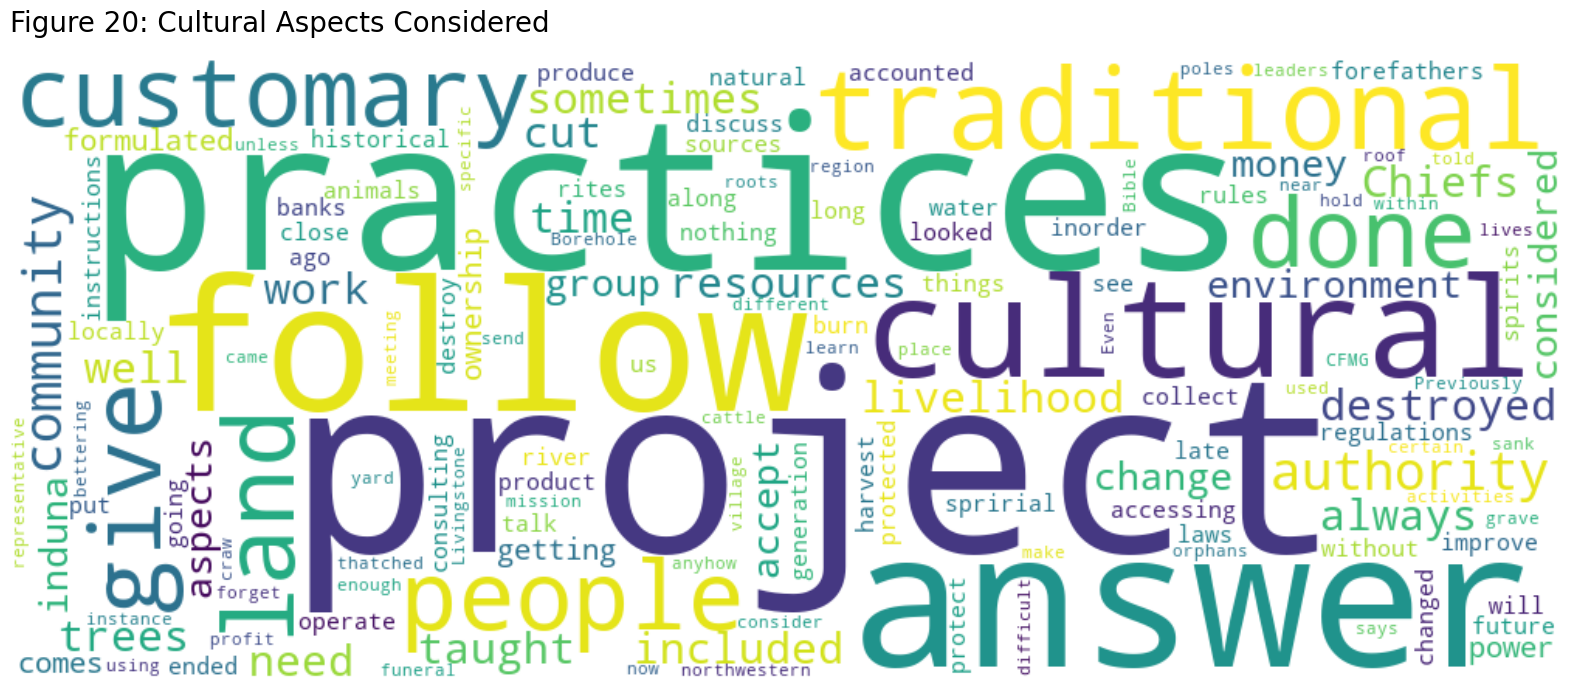

In [188]:
CAC_R1["Cultural_Aspects_Considered_Reasons"] = CAC_R1["Cultural_Aspects_Considered_Reasons"].fillna("")  
CAC_R1["Cultural_Aspects_Considered_Reasons"] = CAC_R1["Cultural_Aspects_Considered_Reasons"].astype(str)
CAC_R1_Text = " ".join(CAC_R1["Cultural_Aspects_Considered_Reasons"])
wordcloud = WordCloud(background_color = "white", width = 1000, height = 400).generate(CAC_R1_Text)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("Figure 20: Cultural Aspects Considered", loc="left", fontsize=20, pad=20)
plt.axis("off")  
plt.show()

In [189]:
agreement_levels = ["Disagree_Likert", "Strongly_Disagree_Likert"]
CAC_R2 = df2[df2["Cultural_Aspects_Considered"].isin(agreement_levels)]
CAC_R3 = CAC_R2.drop(CPH_R2.columns[[0,1,2,3,4,6,7,8,9,10,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34]], axis = 1)
CAC_R3grouped = CAC_R3.groupby('Name_Main_Project')['Cultural_Aspects_Considered']
#CAC_R3

In [190]:
lemmatizer=WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
for index, row in CAC_R3.iterrows():
    CAC_R3_filter_sentence = []
    CAC_R3_sentence = row["Cultural_Aspects_Considered_Reasons"]
    if pd.isnull(CAC_R3_sentence):
       continue
    CAC_R3_sentence_cleaned = re.sub(r'[^\w\s]','',CAC_R3_sentence)
    CAC_R3_words = nltk.word_tokenize(CAC_R3_sentence_cleaned)
    CAC_R3_words = [lemmatizer.lemmatize(w) for w in CAC_R3_words if w.lower() not in stop_words]
    CAC_R3_filter_sentence.extend(CAC_R3_words)
    print(CAC_R3_filter_sentence)

['cultural', 'history', 'area']
['cultural', 'aspect']
['follow', 'chief', 'government', 'say']
['nothing']
['nothing']
['nothing']
['nothing']
['plan', 'given', 'u', 'TRALARD', 'consideration', 'cultural', 'history', 'formulating', 'project']
['nothing']
['moment', 'follow', 'law', 'government', 'cultural', 'norm']
['nothing']
['ask', 'headman', 'give', 'u', 'place', 'keep', 'goat', 'place', 'acceptable', 'traditional', 'law']
['nothing', 'moment', 'traditional', 'leader', 'spritual', 'activity', 'project']
['include', 'cultural', 'practice']
['project', 'move', 'well', 'headman', 'project', 'otherwise', 'included', 'might', 'problem']
['available']
['consider']
['nothing']
['nothing']
[]
['nothing']
[]
['unneccesary']
['anything']
[]
['nothing']
['include']
[]
['nothing']
['include', 'aspect']
['nothing']
['nothing', 'included']
['Nothing', 'considered']
['nothing']
[]
['Nothing', 'considered']
['nothing']
['included']
['include']
['nothing', 'included']
['nothing']
['included']
['No

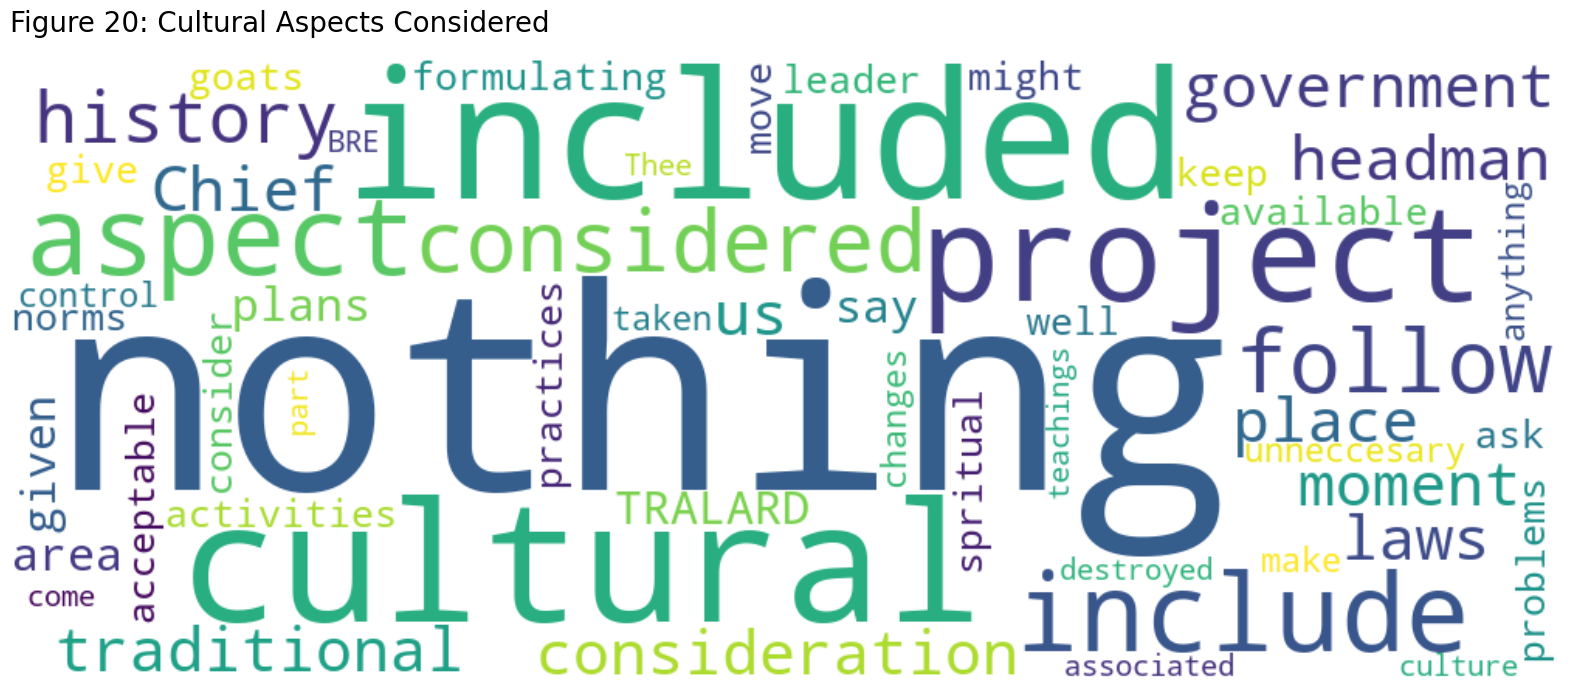

In [191]:
CAC_R3["Cultural_Aspects_Considered_Reasons"] = CAC_R3["Cultural_Aspects_Considered_Reasons"].fillna("")  
CAC_R3["Cultural_Aspects_Considered_Reasons"] = CAC_R3["Cultural_Aspects_Considered_Reasons"].astype(str)
CAC_R3_Text = " ".join(CAC_R3["Cultural_Aspects_Considered_Reasons"])
wordcloud = WordCloud(background_color = "white", width = 1000, height = 400).generate(CAC_R3_Text)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("Figure 20: Cultural Aspects Considered", loc="left", fontsize=20, pad=20)
plt.axis("off")  
plt.show()

### 11.4 Main Project and Measure of Indicators

In [192]:
MI_grouped = df2.groupby('Name_Main_Project')['Measure_Indicators'].value_counts(dropna=False)

In [193]:
MI_grouped1 = pd.DataFrame(MI_grouped)

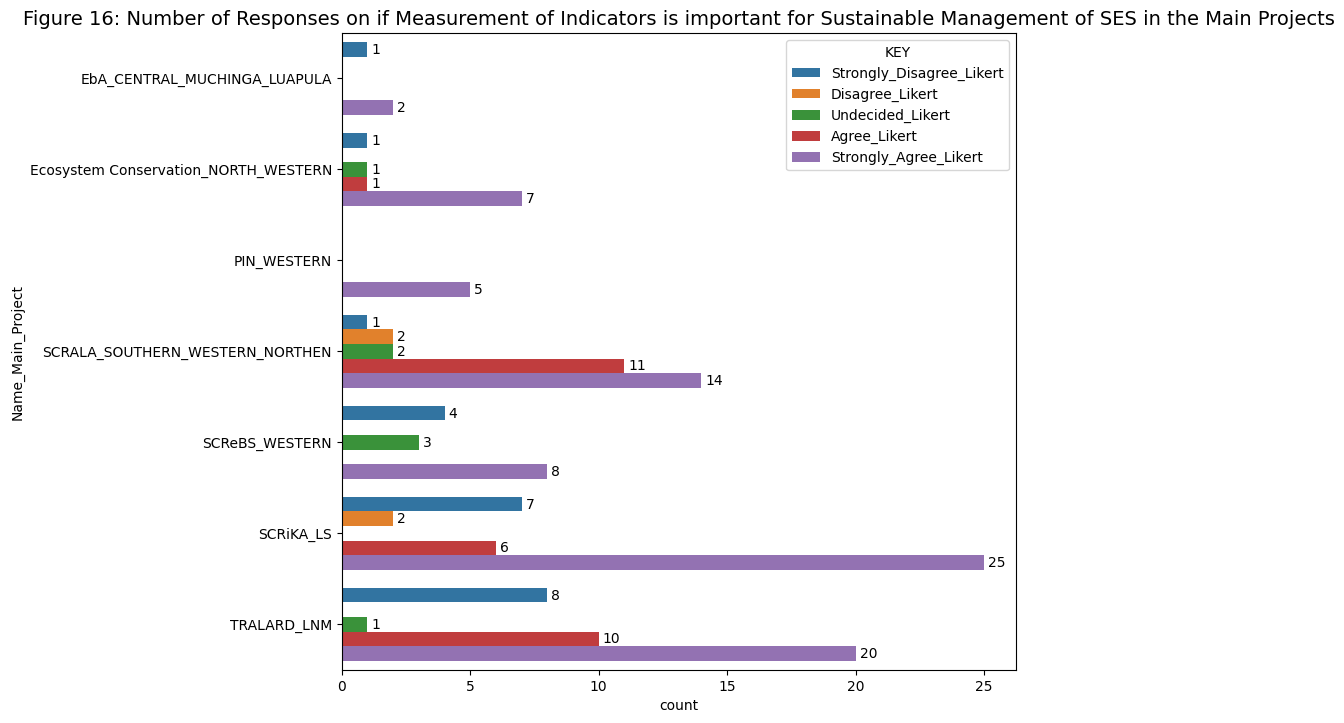

In [194]:
plt.figure(figsize=(8.7, 8.27))
hue_order = ["Strongly_Disagree_Likert", "Disagree_Likert", "Undecided_Likert", "Agree_Likert", "Strongly_Agree_Likert"]
ax = sns.barplot(data = MI_grouped1, x="count", y="Name_Main_Project", hue="Measure_Indicators", hue_order=hue_order, legend=True)
ax.set_title("Figure 16: Number of Responses on if Measurement of Indicators is important for Sustainable Management of SES in the Main Projects", fontsize=14)
plt.legend(title="KEY")
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type="edge", padding=3)
plt.show()

### 11.5 Main Project and Livelihood Dependent

In [195]:
LD_grouped = df2.groupby('Name_Main_Project')['Livilihood_Depenedent'].value_counts(dropna=False)

In [196]:
LD_grouped1 = pd.DataFrame(LD_grouped)

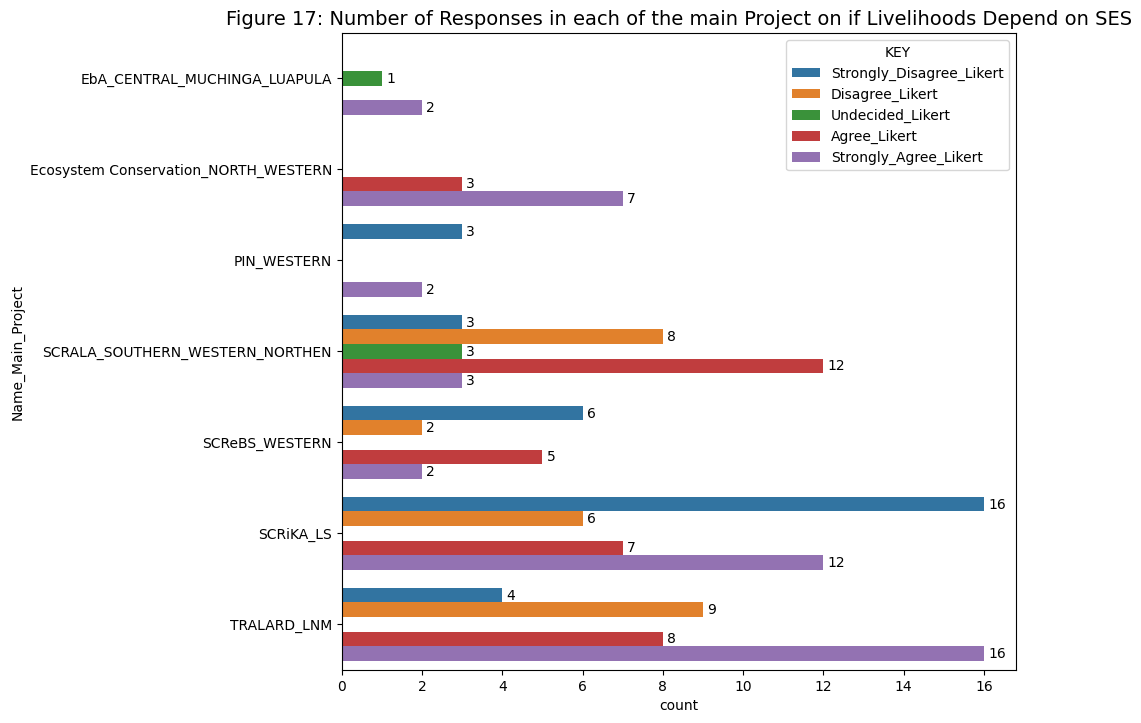

In [197]:
plt.figure(figsize=(8.7, 8.27))
hue_order = ["Strongly_Disagree_Likert", "Disagree_Likert", "Undecided_Likert", "Agree_Likert", "Strongly_Agree_Likert"]
ax = sns.barplot(data = LD_grouped1, x="count", y="Name_Main_Project", hue="Livilihood_Depenedent", hue_order=hue_order, legend=True)
ax.set_title("Figure 17: Number of Responses in each of the main Project on if Livelihoods Depend on SES", fontsize=14)
plt.legend(title="KEY")
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type="edge", padding=3)
plt.show()

### 11.6 Main Project and Livelihood Changed

In [198]:
CL_grouped = df2.groupby('Name_Main_Project')['Change_Livelihood'].value_counts(dropna=False)

In [199]:
CL_grouped1 = pd.DataFrame(CL_grouped)

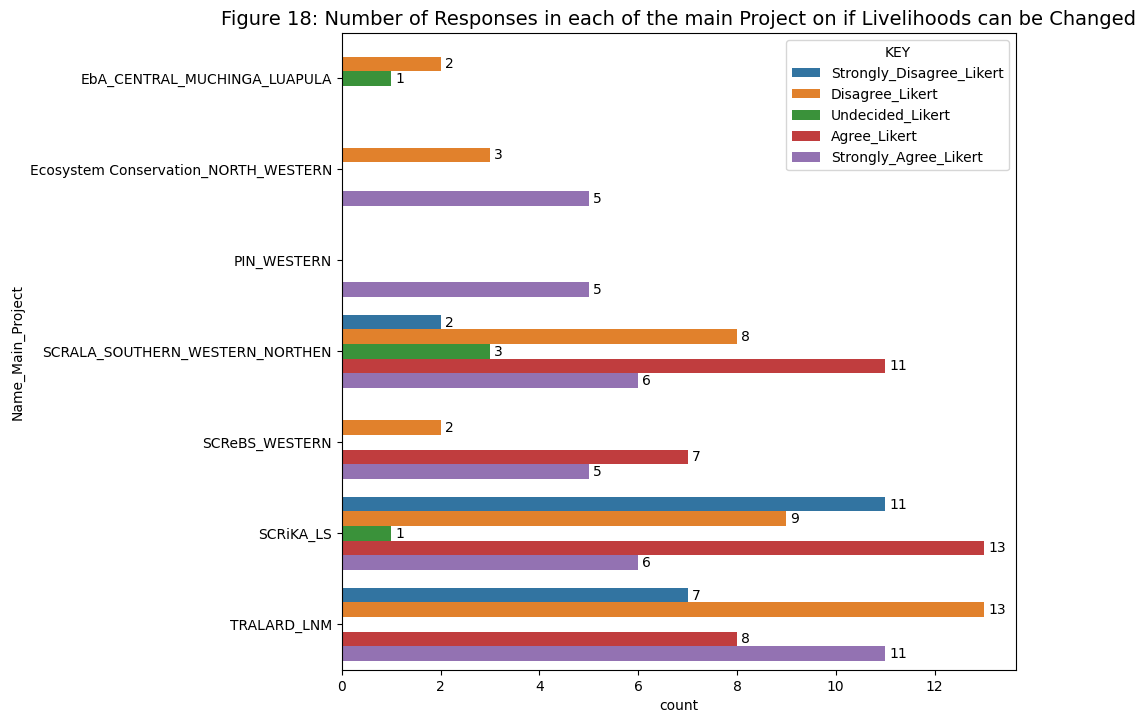

In [200]:
plt.figure(figsize=(8.7, 8.27))
hue_order = ["Strongly_Disagree_Likert", "Disagree_Likert", "Undecided_Likert", "Agree_Likert", "Strongly_Agree_Likert"]
ax = sns.barplot(data = CL_grouped1, x="count", y="Name_Main_Project", hue="Change_Livelihood", hue_order=hue_order, legend=True)
ax.set_title("Figure 18: Number of Responses in each of the main Project on if Livelihoods can be Changed", fontsize=14)
plt.legend(title="KEY")
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type="edge", padding=3)
plt.show()

### 11.7 Main Project and Livelihood Changing Easy

In [201]:
CLE_grouped = df2.groupby('Name_Main_Project')['Change_Livelihood_Easy'].value_counts(dropna=False)

In [202]:
CLE_grouped1 = pd.DataFrame(CLE_grouped)

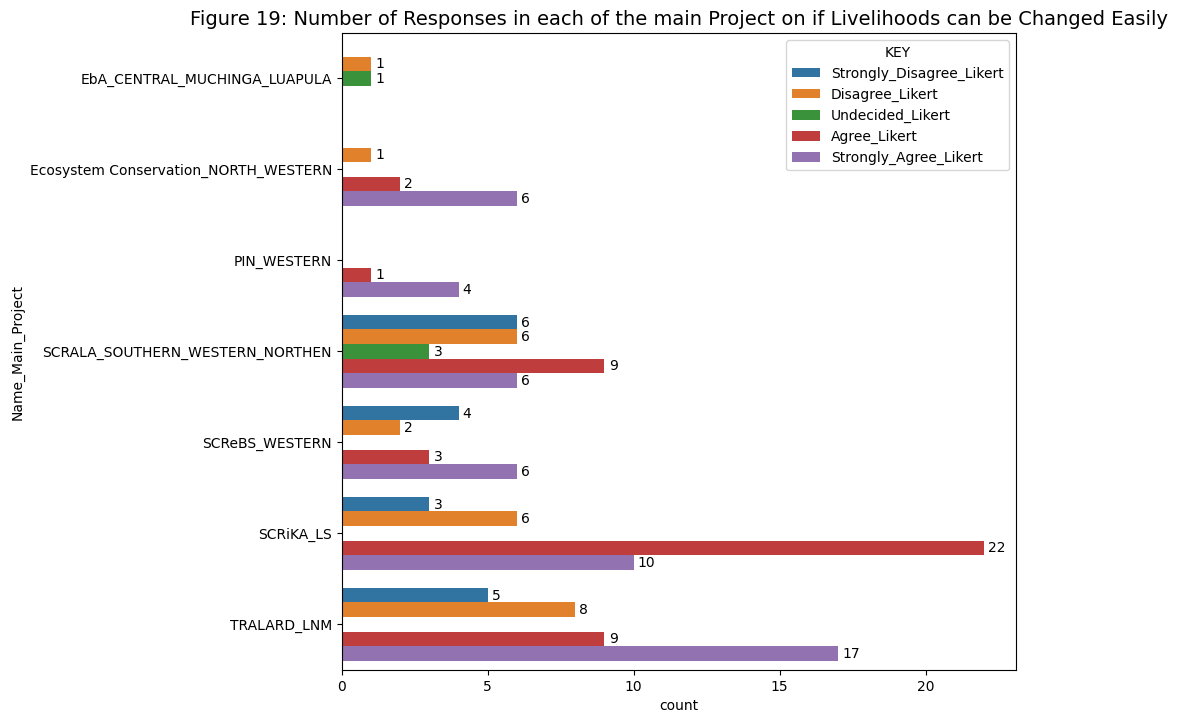

In [203]:
plt.figure(figsize=(8.7, 8.27))
hue_order = ["Strongly_Disagree_Likert", "Disagree_Likert", "Undecided_Likert", "Agree_Likert", "Strongly_Agree_Likert"]
ax = sns.barplot(data = CLE_grouped1, x="count", y="Name_Main_Project", hue="Change_Livelihood_Easy", hue_order=hue_order, legend=True)
ax.set_title("Figure 19: Number of Responses in each of the main Project on if Livelihoods can be Changed Easily", fontsize=14)
plt.legend(title="KEY")
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type="edge", padding=3)
plt.show()

In [204]:
agreement_levels = ["Agree_Likert", "Strongly_Agree_Likert"]
CLE_R = df2[df2["Change_Livelihood_Easy"].isin(agreement_levels)]
CLE_R1 = CLE_R.drop(CLE_R.columns[[0,1,2,3,4,6,7,8,9,10,11,12,13,14,15,16,17,18,19,22,23,24,25,26,27,28,29,30,31,32,33,34]], axis = 1)
CLE_R1grouped = CLE_R1.groupby('Name_Main_Project')['Change_Livelihood_Easy']
#CLE_R1

In [205]:
lemmatizer=WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
for index, row in CLE_R1.iterrows():
    CLE_R1_filter_sentence = []
    CLE_R1_sentence = row["Change_Livelihood_Easy_Reasons"]
    if pd.isnull(CLE_R1_sentence):
       continue
    CLE_R1_sentence_cleaned = re.sub(r'[^\w\s]','',CLE_R1_sentence)
    CLE_R1_words = nltk.word_tokenize(CLE_R1_sentence_cleaned)
    CLE_R1_words = [lemmatizer.lemmatize(w) for w in CLE_R1_words if w.lower() not in stop_words]
    CLE_R1_filter_sentence.extend(CLE_R1_words)
    print(CLE_R1_filter_sentence)

['SES', 'taken', 'care', 'increase', 'number', 'bring', 'income']
['SeS', 'depleted', 'thus', 'need', 'change', 'agriculture', 'like', 'goat', 'rearing']
['Change', 'easier', 'one', 'decides', 'change']
['thing', 'like', 'climate', 'change', 'affecting', 'u', 'thus', 'thought', 'change']
['new', 'improvement', 'like', 'cooking', 'stove', 'change', 'way', 'livelihood']
['destruction', 'SES']
['need', 'change', 'cutting', 'activity']
['need', 'change', 'activity', 'destroy', 'environment']
['changed', 'learning']
['kept', 'well', 'project', 'like', 'chicken', 'goat', 'would', 'help', 'depend', 'natural', 'resource']
['fish', 'pond', 'project']
['also', 'improve', 'livelihood', 'future']
['long', 'money', 'livelihood']
['want', 'venture', 'farming', 'reason', 'shifted', 'place', 'located']
['sub', 'project', 'bee', 'keeping', 'disturbed', 'late', 'burning', 'early', 'burning', 'disturb', 'fire', 'much']
['need', 'change', 'instance', 'depend', 'water', 'Lulimala', 'river', 'dry', 'get', '

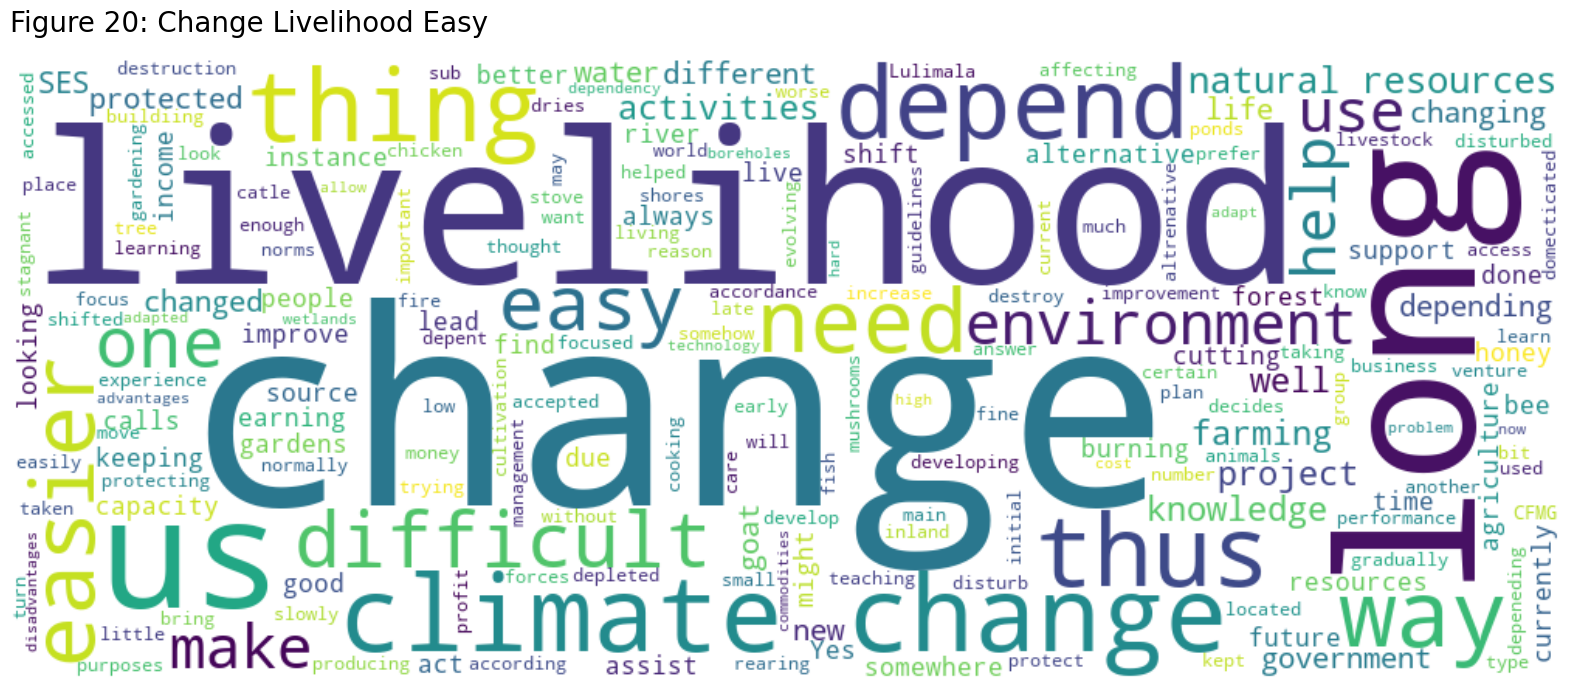

In [206]:
CLE_R1["Change_Livelihood_Easy_Reasons"] = CLE_R1["Change_Livelihood_Easy_Reasons"].fillna("")  
CLE_R1["Change_Livelihood_Easy_Reasons"] = CLE_R1["Change_Livelihood_Easy_Reasons"].astype(str)
CLE_R1_Text = " ".join(CLE_R1["Change_Livelihood_Easy_Reasons"])
wordcloud = WordCloud(background_color = "white", width = 1000, height = 400).generate(CLE_R1_Text)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("Figure 20: Change Livelihood Easy", loc="left", fontsize=20, pad=20)
plt.axis("off")  
plt.show()

In [207]:
agreement_levels = ["Disagree_Likert", "Strongly_Disagree_Likert"]
CLE_R2 = df2[df2["Change_Livelihood_Easy"].isin(agreement_levels)]
CLE_R3 = CLE_R2.drop(CLE_R2.columns[[0,1,2,3,4,6,7,8,9,10,11,12,13,14,15,16,17,18,19,22,23,24,25,26,27,28,29,30,31,32,33,34]], axis = 1)
CLE_R3grouped = CLE_R3.groupby('Name_Main_Project')['Change_Livelihood_Easy']
#CLE_R3

In [208]:
lemmatizer=WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
for index, row in CLE_R3.iterrows():
    CLE_R3_filter_sentence = []
    CLE_R3_sentence = row["Change_Livelihood_Easy_Reasons"]
    if pd.isnull(CLE_R3_sentence):
       continue
    CLE_R3_sentence_cleaned = re.sub(r'[^\w\s]','',CLE_R3_sentence)
    CLE_R3_words = nltk.word_tokenize(CLE_R3_sentence_cleaned)
    CLE_R3_words = [lemmatizer.lemmatize(w) for w in CLE_R3_words if w.lower() not in stop_words]
    CLE_R3_filter_sentence.extend(CLE_R3_words)
    print(CLE_R3_filter_sentence)

['livelihood', 'would', 'improve']
['everything', 'use', 'come', 'natural', 'resource', 'like', 'tree', 'building', 'animal', 'protein']
['source', 'income']
['assist', 'adequate', 'water', 'tree', 'cut', 'well', 'future', 'general', 'see', 'natural', 'resource']
['world', 'becoming', 'mordenised', 'thus', 'need', 'adapt', 'current', 'status']
['Thats', 'income', 'come']
['depend', 'natural', 'resource', 'thus', 'changing', 'easy']
['use', 'natural', 'resource']
['depend', 'agriculture', 'natural', 'resource', 'like', 'forest']
['mostly', 'use', 'goat', 'pig', 'livelihood']
['livelihood', 'engage', 'keeping', 'goat', 'fish', 'farming']
['livelihood', 'like', 'keeping', 'goat', 'chicken', 'gardening', 'hiring', 'wedding', 'dress']
['use', 'domesticated', 'animal']
['use']
['thing', 'learning', 'already']
['money', 'protection', 'environment', 'yet', 'money', 'carbon', 'trade', 'waiting', 'long', 'time']
['used']
['changing', 'another', 'lifestyle', 'mean', 'starting', 'new', 'life']
['c

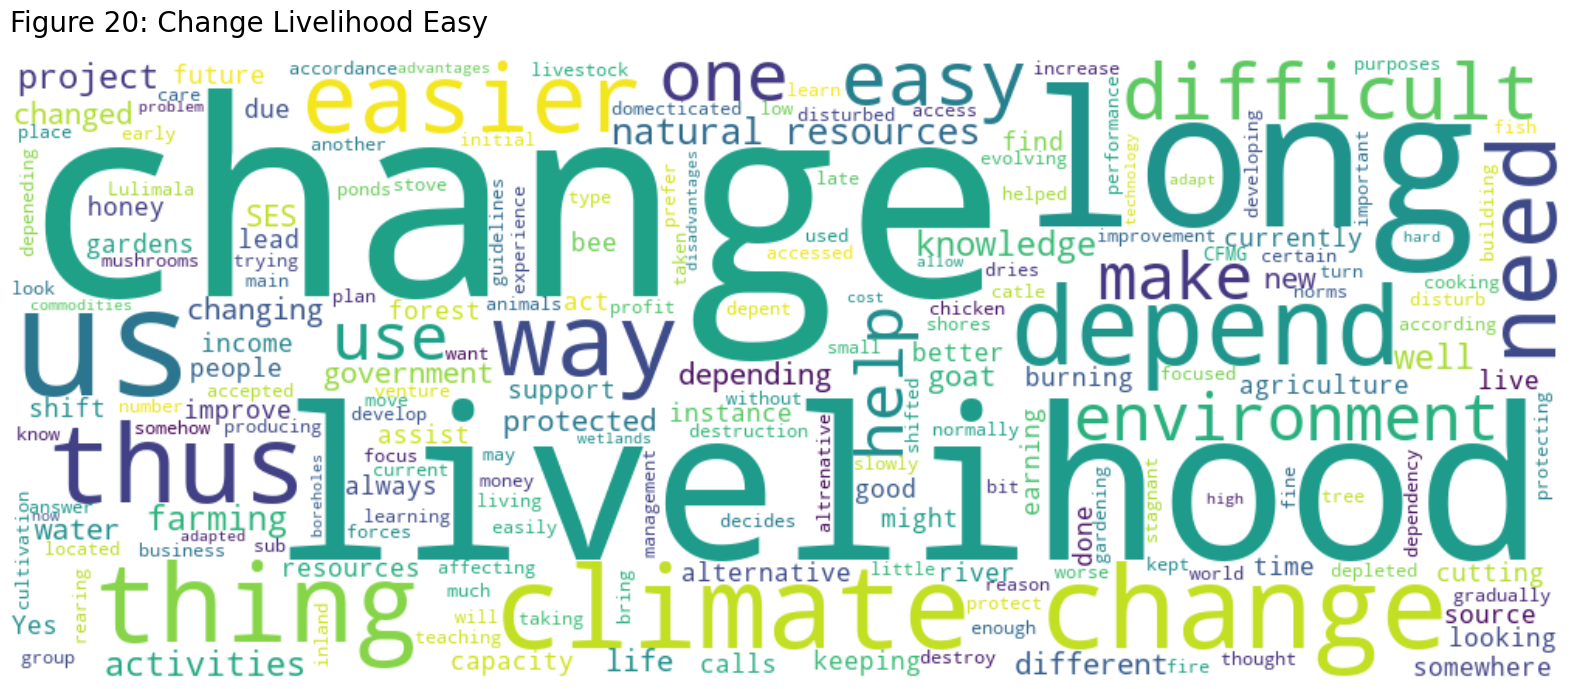

In [209]:
CLE_R3["Change_Livelihood_Easy_Reasons"] = CLE_R3["Change_Livelihood_Easy_Reasons"].fillna("")  
CLE_R3["Change_Livelihood_Easy_Reasons"] = CLE_R3["Change_Livelihood_Easy_Reasons"].astype(str)
CLE_R3_Text = " ".join(CLE_R1["Change_Livelihood_Easy_Reasons"])
wordcloud = WordCloud(background_color = "white", width = 1000, height = 400).generate(CLE_R3_Text)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("Figure 20: Change Livelihood Easy", loc="left", fontsize=20, pad=20)
plt.axis("off")  
plt.show()

### 11.8 Main Project and Ecosystem Service Reduction

In [210]:
ESR_grouped = df2.groupby('Name_Main_Project')['Ecosystem_Services_Reduced'].value_counts(dropna=False)

In [211]:
ESR_grouped1 = pd.DataFrame(ESR_grouped)

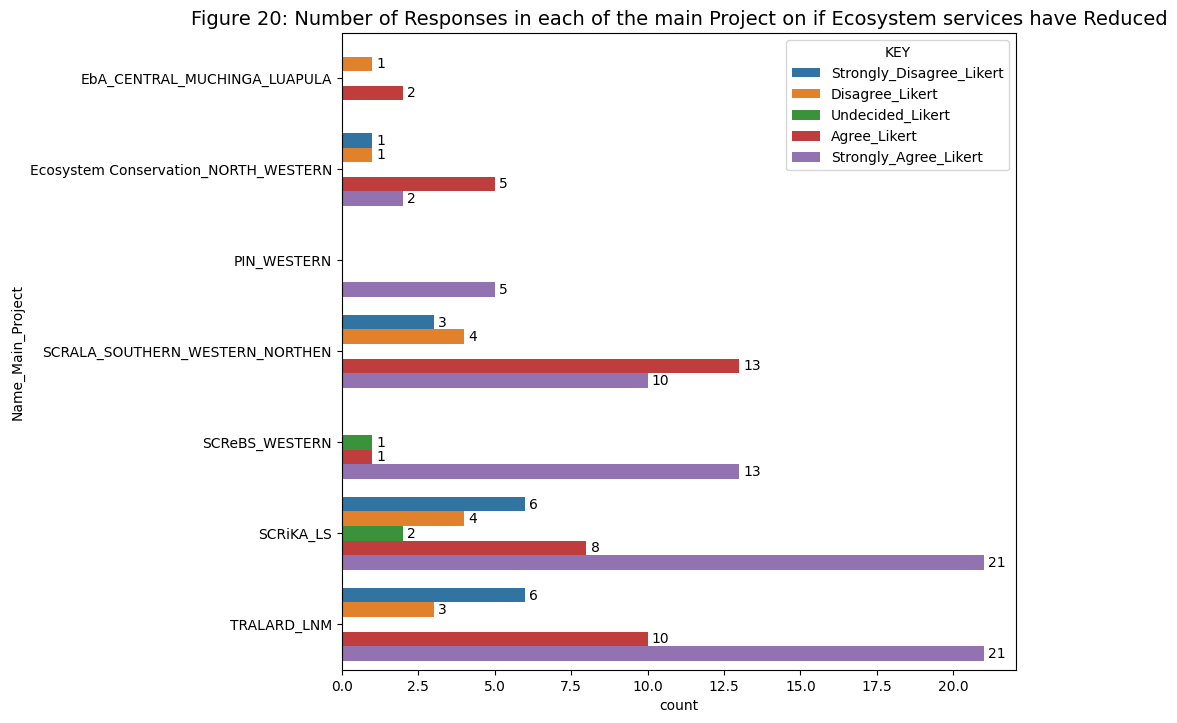

In [212]:
plt.figure(figsize=(8.7, 8.27))
hue_order = ["Strongly_Disagree_Likert", "Disagree_Likert", "Undecided_Likert", "Agree_Likert", "Strongly_Agree_Likert"]
ax = sns.barplot(data = ESR_grouped1, x="count", y="Name_Main_Project", hue="Ecosystem_Services_Reduced", hue_order=hue_order, legend=True)
ax.set_title("Figure 20: Number of Responses in each of the main Project on if Ecosystem services have Reduced", fontsize=14)
plt.legend(title="KEY")
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type="edge", padding=3)
plt.show()

### 11.9 Main project and Deforestation Increase

In [213]:
DI_grouped = df2.groupby('Name_Main_Project')['Deforestaion_Increased'].value_counts(dropna=False)

In [214]:
DI_grouped1 = pd.DataFrame(DI_grouped)

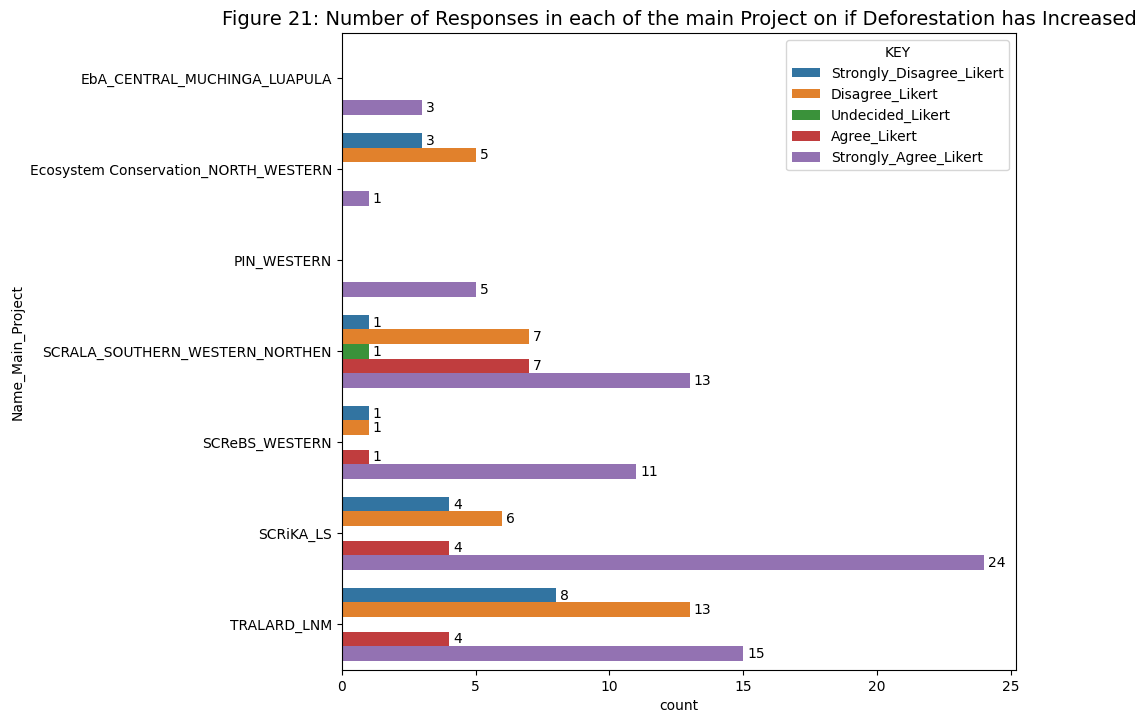

In [215]:
plt.figure(figsize=(8.7, 8.27))
hue_order = ["Strongly_Disagree_Likert", "Disagree_Likert", "Undecided_Likert", "Agree_Likert", "Strongly_Agree_Likert"]
ax = sns.barplot(data = DI_grouped1, x="count", y="Name_Main_Project", hue="Deforestaion_Increased", hue_order=hue_order, legend=True)
ax.set_title("Figure 21: Number of Responses in each of the main Project on if Deforestation has Increased", fontsize=14)
plt.legend(title="KEY")
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type="edge", padding=3)
plt.show()

### 11.10 Main project and Protected Areas as a Hinderance

In [216]:
PAHL_grouped = df2.groupby('Name_Main_Project')['Protected_Areas_Hinderarnce_Livelihood'].value_counts(dropna=False)

In [217]:
PAHL_grouped1 = pd.DataFrame(PAHL_grouped)

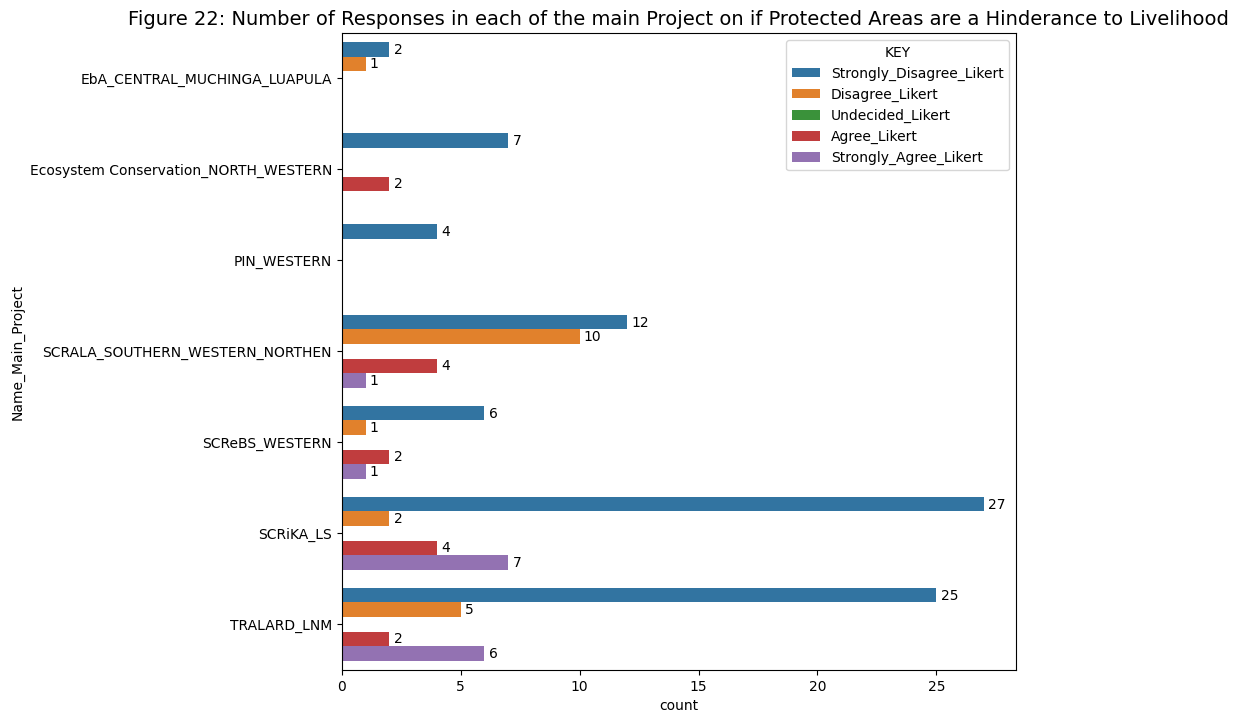

In [218]:
plt.figure(figsize=(8.7, 8.27))
hue_order = ["Strongly_Disagree_Likert", "Disagree_Likert", "Undecided_Likert", "Agree_Likert", "Strongly_Agree_Likert"]
ax = sns.barplot(data = PAHL_grouped1, x="count", y="Name_Main_Project", hue="Protected_Areas_Hinderarnce_Livelihood", hue_order=hue_order, legend=True)
ax.set_title("Figure 22: Number of Responses in each of the main Project on if Protected Areas are a Hinderance to Livelihood", fontsize=14)
plt.legend(title="KEY")
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type="edge", padding=3)
plt.show()

### 11.11 Main Project and New Livelihood Projects

In [219]:
NLP_grouped = df2.groupby('Name_Main_Project')['New_Livelihood_Projects'].value_counts(dropna=False)

In [220]:
NLP_grouped1 = pd.DataFrame(NLP_grouped)

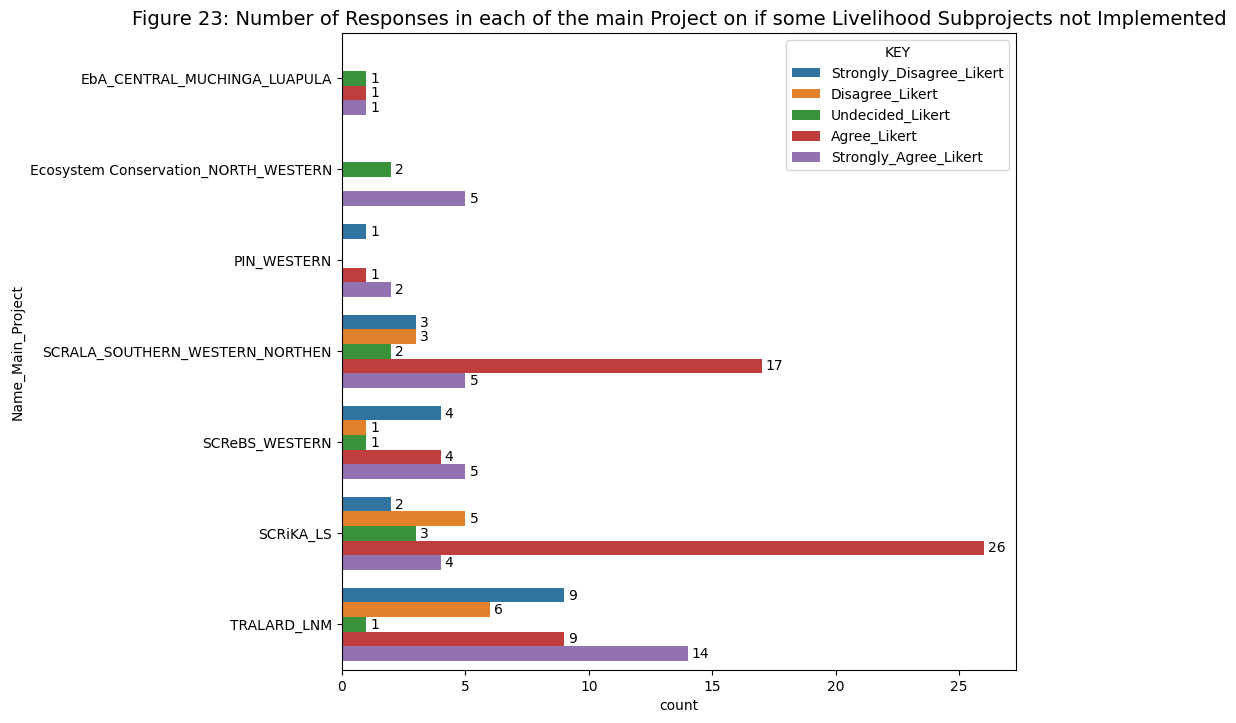

In [221]:
plt.figure(figsize=(8.7, 8.27))
hue_order = ["Strongly_Disagree_Likert", "Disagree_Likert", "Undecided_Likert", "Agree_Likert", "Strongly_Agree_Likert"]
ax = sns.barplot(data = NLP_grouped1, x="count", y="Name_Main_Project", hue="New_Livelihood_Projects", hue_order=hue_order, legend=True)
ax.set_title("Figure 23: Number of Responses in each of the main Project on if some Livelihood Subprojects not Implemented", fontsize=14)
plt.legend(title="KEY")
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type="edge", padding=3)
plt.show()

### 11.12 Main Project and Sustainability of Subprojects

In [222]:
SSC_grouped = df2.groupby('Name_Main_Project')['Subprojects_Sustainability_Contribution'].value_counts(dropna=False)

In [223]:
SSC_grouped1 = pd.DataFrame(SSC_grouped)

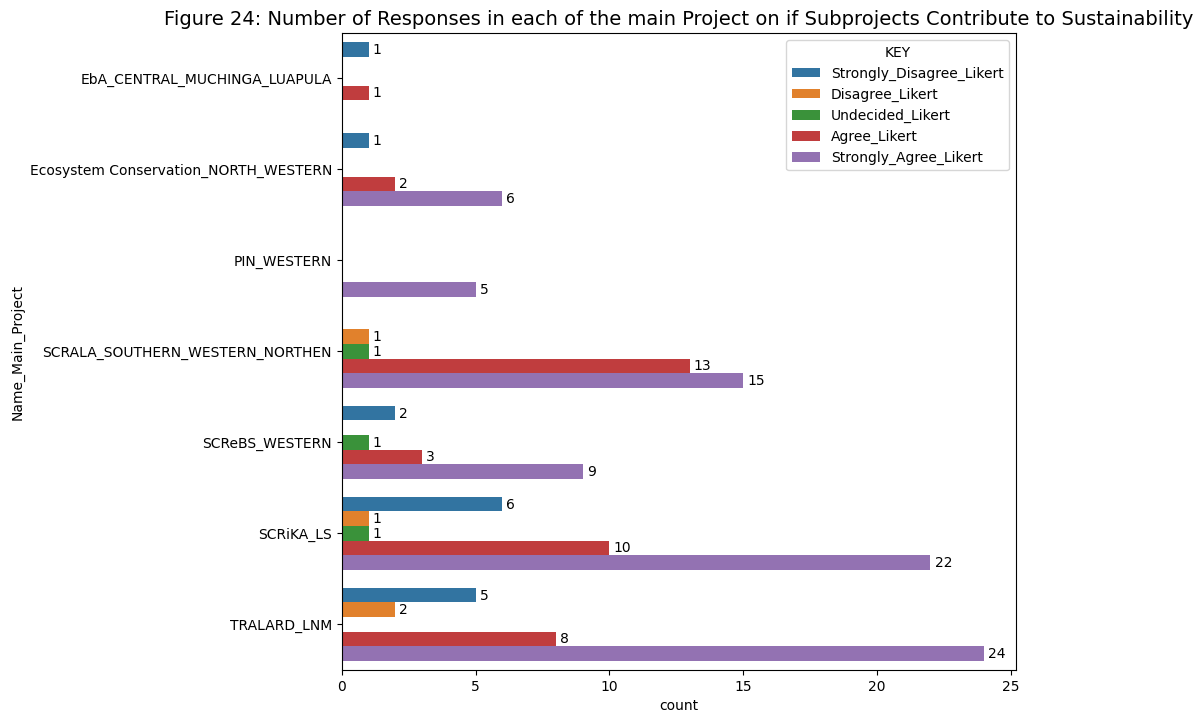

In [235]:
plt.figure(figsize=(8.7, 8.27))
hue_order = ["Strongly_Disagree_Likert", "Disagree_Likert", "Undecided_Likert", "Agree_Likert", "Strongly_Agree_Likert"]
ax = sns.barplot(data = SSC_grouped1, x="count", y="Name_Main_Project", hue="Subprojects_Sustainability_Contribution", hue_order=hue_order, legend=True)
ax.set_title("Figure 24: Number of Responses in each of the main Project on if Subprojects Contribute to Sustainability", fontsize=14)
plt.legend(title="KEY")
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type="edge", padding=3)
plt.show()
plt.savefig("charts.png", dpi=300)

[<a href="#Purpose-of-the-Analysis">Back to top</a>]

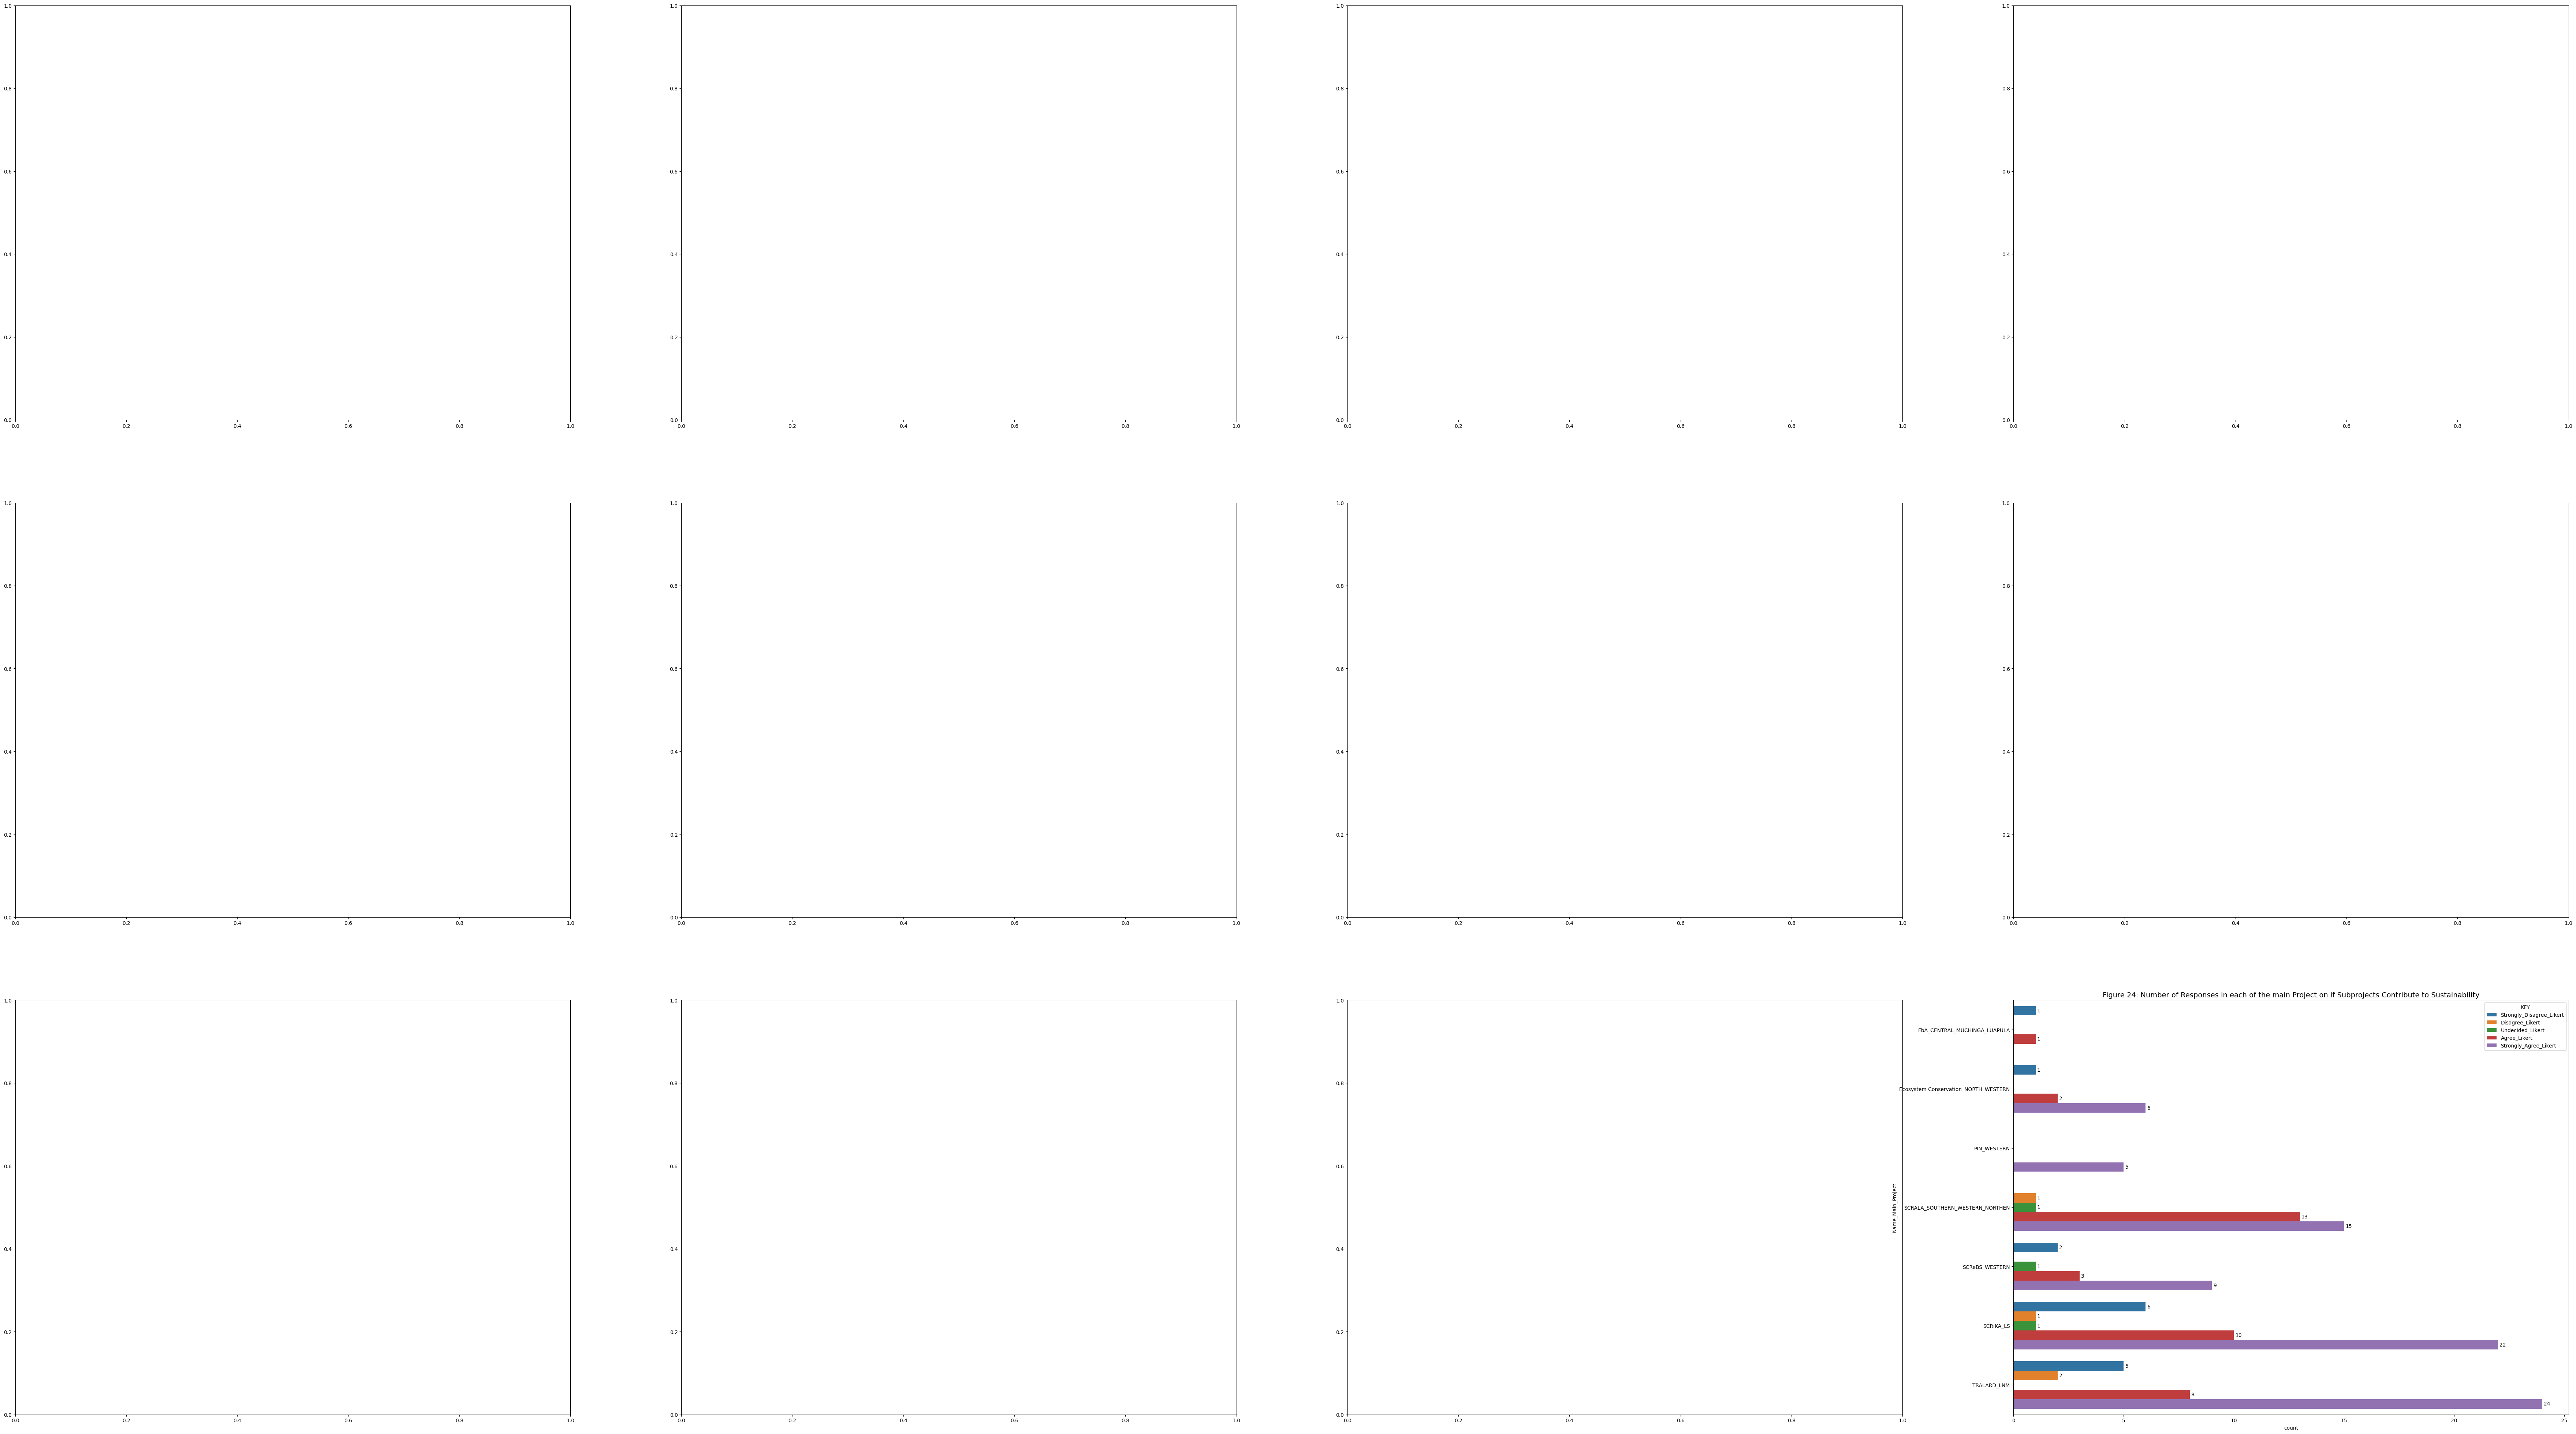

In [234]:
#plt.figure(figsize=(8.7, 8.27))
fig, axes = plt.subplots(3, 4, figsize=(90, 50))
hue_order = ["Strongly_Disagree_Likert", "Disagree_Likert", "Undecided_Likert", "Agree_Likert", "Strongly_Agree_Likert"]
ax = sns.barplot(data = SSC_grouped1, x="count", y="Name_Main_Project", hue="Subprojects_Sustainability_Contribution", hue_order=hue_order, legend=True)
ax.set_title("Figure 24: Number of Responses in each of the main Project on if Subprojects Contribute to Sustainability", fontsize=14)
plt.legend(title="KEY")
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type="edge", padding=3)
plt.show()

## 12. Converting the Notebook

In [225]:
with open('02_Landscape_Transformation_Livelihood.ipynb', 'r') as f:
    notebook = nbformat.read(f, as_version=4)

# Initialize the HTML Exporter
html_exporter = HTMLExporter()
(body, resources) = html_exporter.from_notebook_node(notebook)

# Save the HTML output
with open('02_Landscape_Transformation_Livelihood.html', 'w') as f:
    f.write(body)

print("Conversion to HTML completed!")

Conversion to HTML completed!


[<a href="#Purpose-of-the-Analysis">Back to top</a>]